<a href="https://colab.research.google.com/github/ItzelCabrera/Machine-Learning-Techniques/blob/master/AnalisisDelincuencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Intro

In [ ]:
#!pip install geopandas
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
type_scale = 'standard' #robust or standard

# Indicadores

importan paquetes y archivos para mostrar las clasificaciones



In [ ]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt

data_dir = '/content/drive/MyDrive/ProgramaDelfín_23/Delfin 2023/Analisis delincuencia/data/' #ruta de directorio de los archivos de datos

#LEE LA CARTOGRAFÍA DE ENTIDADES Y MUNICIPIOS DE MÉXICO
fileindex = os.path.join(data_dir, 'national/national_estatal.shp')
base_i = gpd.read_file(fileindex) #base del mapa --> mapa de México con sus delimitación geográfica
fileindex = os.path.join(data_dir, 'conjunto_de_datos/00mun.shp')
layer_i = gpd.read_file(fileindex,index = "CVEGEO")
layer_i= layer_i.to_crs("EPSG:4326") # corrige el sistema de coordenadas de referencia para los municipios --> utiliza latitud y longitud

fileindex = os.path.join(data_dir, 'vacio.xlsx') # datos de indicadores
bd_i = pd.read_excel(fileindex,sheet_name='datos') #DataFrame creado que contendrá los datos de los indicadores
#preprocesamiento
bd_i = bd_i.drop(['CVE_ENT','NOM_ENT','NOM_MUN'], axis = 1)#eliminamos cols innecesarias
bd_i["CVE_MUN"] = bd_i["CVE_MUN"].astype(str)#cambiamos el índice a formato str
aux = bd_i[bd_i["CVE_MUN"].str.len() < 5] #obtengo el conjunto de datos a modificar
bd_i.loc[0:len(aux)-1, "CVE_MUN"] = '0' + aux["CVE_MUN"].astype(str)
bd_i.set_index('CVE_MUN', inplace=True)
cluster_variables = bd_i.columns.tolist()
n_covariables = len(cluster_variables)

# une la información cartográfica y del dataframe; utiliza el código de municipio (CVE_MUN) como clave de unión
layer_i = layer_i.merge(bd_i, left_on="CVEGEO",right_on=bd_i.index)

## Conjunto

In [ ]:
!pip install mapclassify

Se muestran todos los indicadores

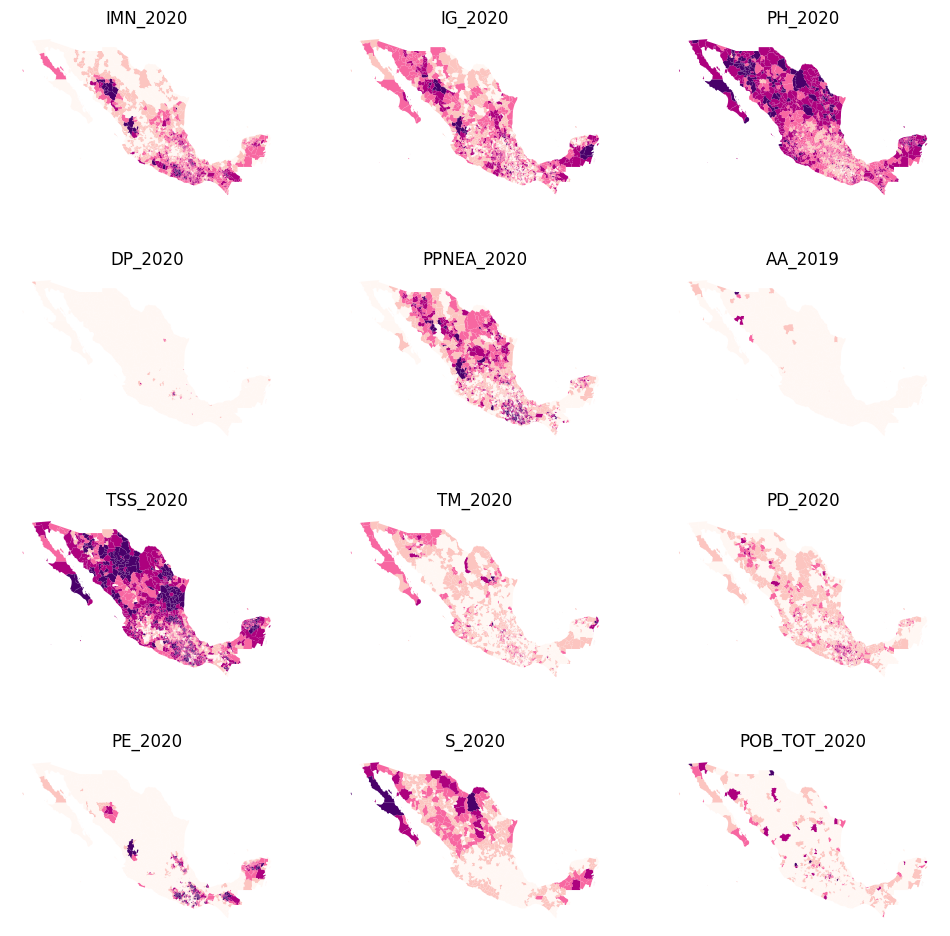

In [ ]:
f,axs = plt.subplots(nrows = 4, ncols = 3, figsize = (12,12))
axs = axs.flatten()

for i,col in enumerate(cluster_variables):
  ax = axs[i]
  layer_i.plot(
      column = col,
      ax = ax,
      scheme = "Fisher_Jenks",
      linewidth = 0,
      cmap = "RdPu",
  )
  ax.set_axis_off()
  ax.set_title(col)

plt.show()

## 01_Indice de marginacion

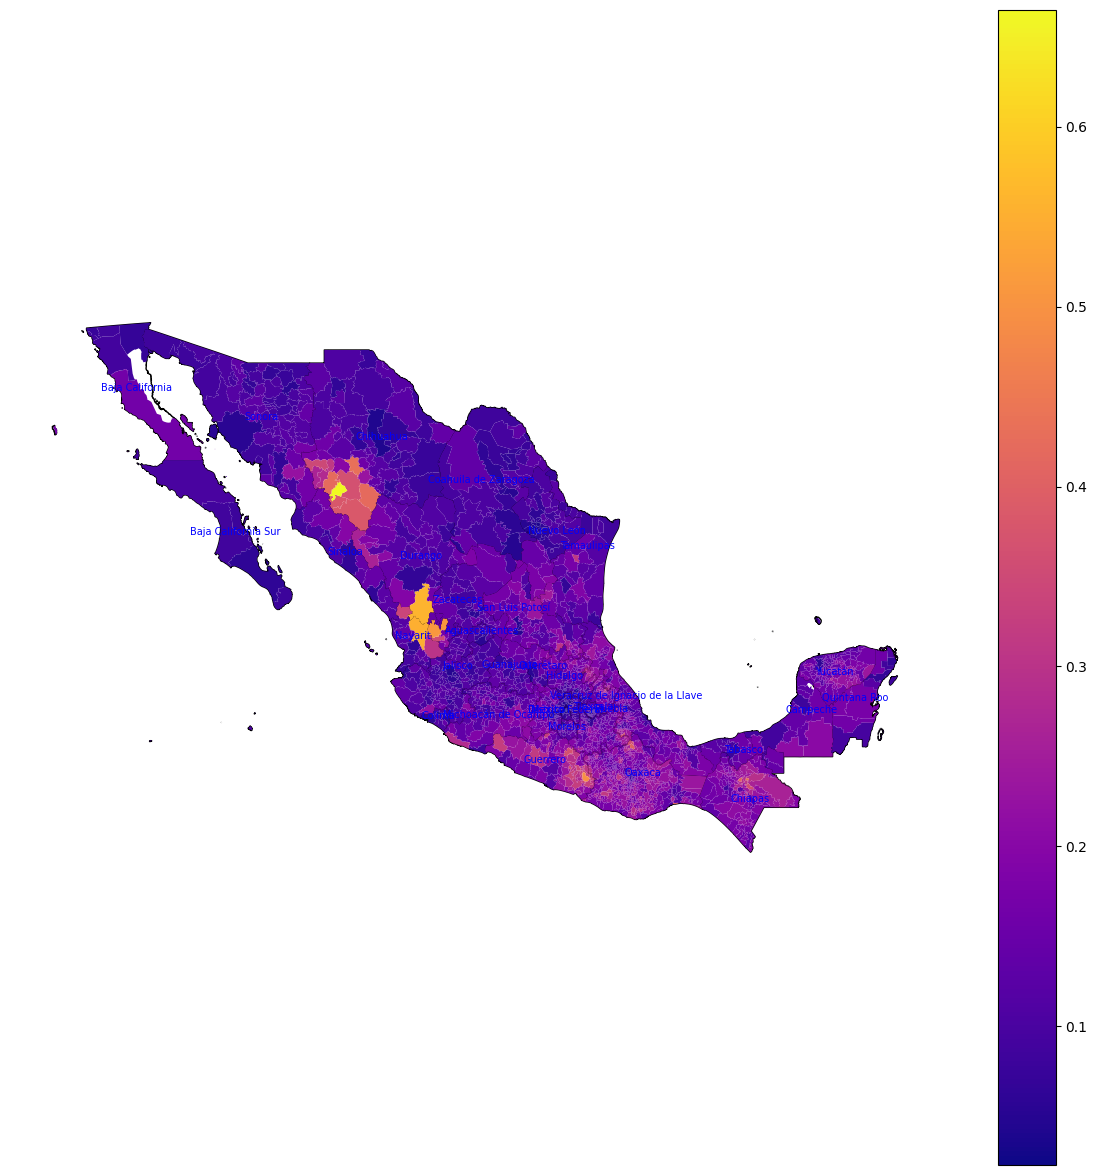

In [ ]:
#Código para visualizar un mapa de México con el índice de marginación POR MUNICIPIO
# grafica el indicador a nivel municipal
## extrae las coordenadas de los políginos de entidades
base_i['coords'] = base_i['geometry'].apply(lambda x: x.representative_point().coords[:])
base_i['coords'] = [coords[0] for coords in base_i['coords']]
#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base_i.plot(color='white', edgecolor='black', ax=ax)
# muestra los nombres de las entidades
for idx, row in base_i.iterrows():
   plt.annotate(text=row['NOMBRE'], xy=row['coords'], horizontalalignment='center', color='blue', fontsize=7)
# mapa de los municipios con su IM
layer_i.plot(column='IMN_2020', categorical=False, legend=True, linewidth=0, ax=ax, cmap="plasma")
# Remove axis
ax.set_axis_off()
plt.show()

## 02_Indice de Gini


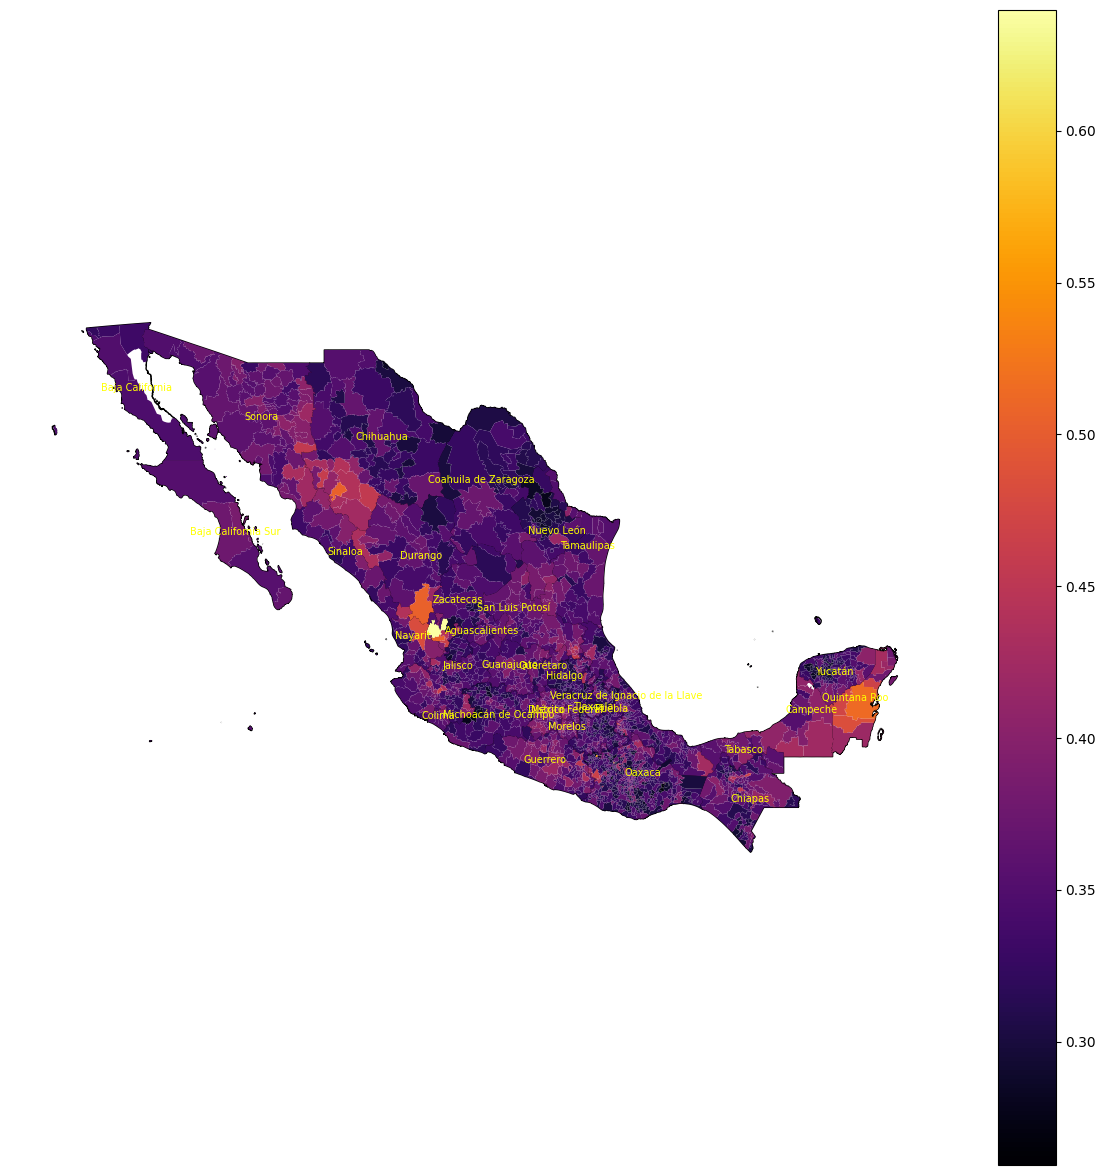

In [ ]:
#Código para visualizar un mapa de México con el índice de gini POR MUNICIPIO
# grafica el indicador a nivel municipal
## extrae las coordenadas de los políginos de entidades
base_i['coords'] = base_i['geometry'].apply(lambda x: x.representative_point().coords[:])
base_i['coords'] = [coords[0] for coords in base_i['coords']]
#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base_i.plot(color='white', edgecolor='black', ax=ax)
# muestra los nombres de las entidades
for idx, row in base_i.iterrows():
   plt.annotate(text=row['NOMBRE'], xy=row['coords'], horizontalalignment='center', color='yellow', fontsize=7)
# mapa de los municipios con su índice de gini
layer_i.plot(column='IG_2020', categorical=False, legend=True, linewidth=0, ax=ax, cmap="inferno")
# Remove axis
ax.set_axis_off()
plt.show()

## 03_Porcentaje de Hombres  

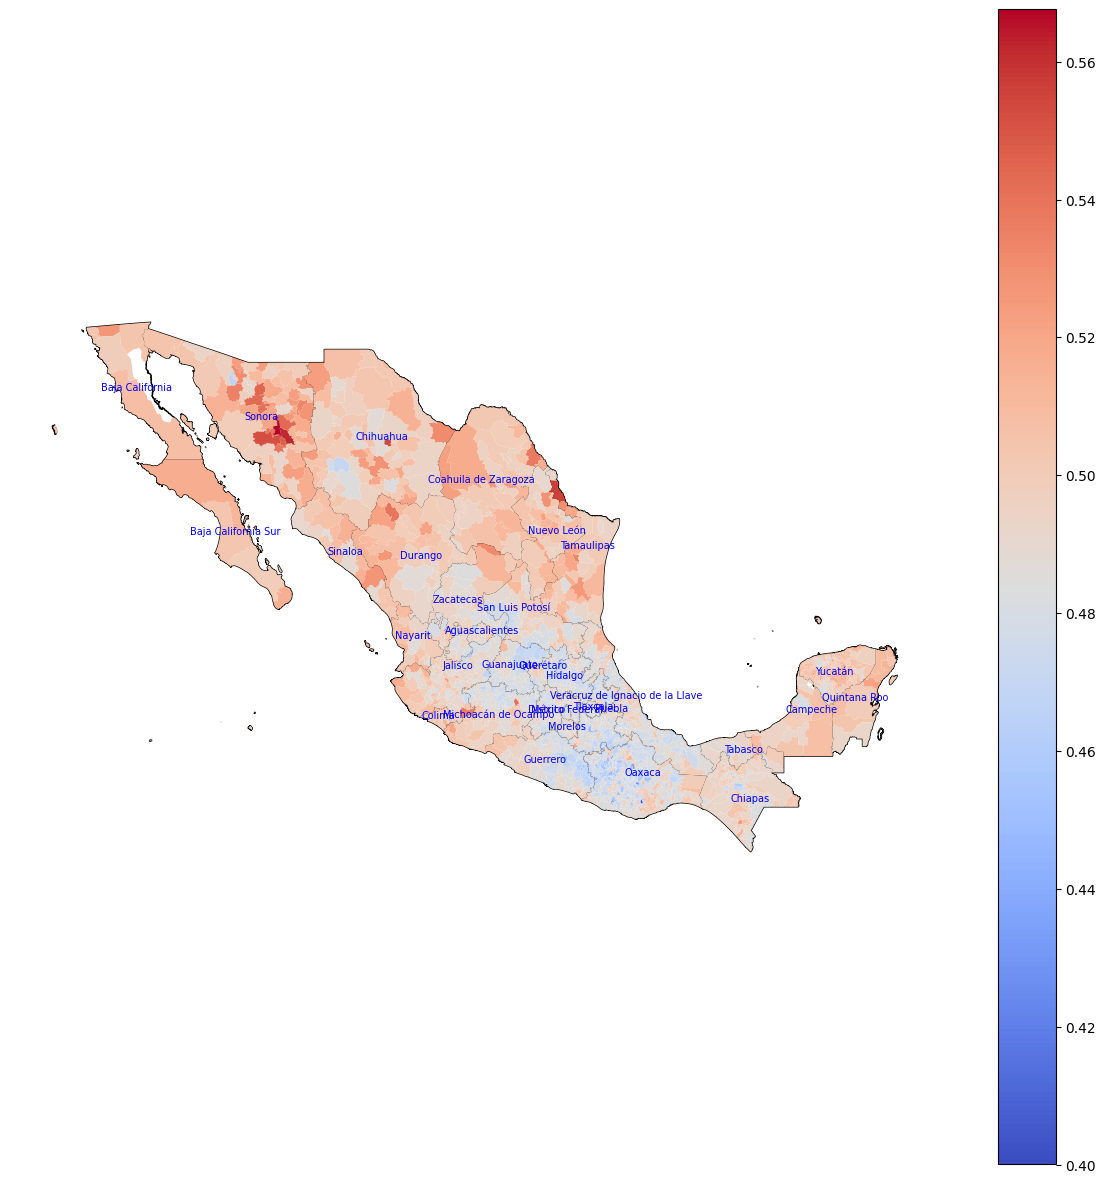

In [ ]:
#Código para visualizar un mapa de México con el % de hombres POR MUNICIPIO
# grafica el indicador a nivel municipal
## extrae las coordenadas de los políginos de entidades
base_i['coords'] = base_i['geometry'].apply(lambda x: x.representative_point().coords[:])
base_i['coords'] = [coords[0] for coords in base_i['coords']]
#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base_i.plot(color='white', edgecolor='black', ax=ax)
# muestra los nombres de las entidades
for idx, row in base_i.iterrows():
   plt.annotate(text=row['NOMBRE'], xy=row['coords'], horizontalalignment='center', color='blue', fontsize=7)
# mapa de los municipios con su % de hombres
layer_i.plot(column='PH_2020', categorical=False, legend=True, linewidth=0, ax=ax, cmap="coolwarm")
# Remove axis
ax.set_axis_off()
plt.show()

## 04_Densidad de población



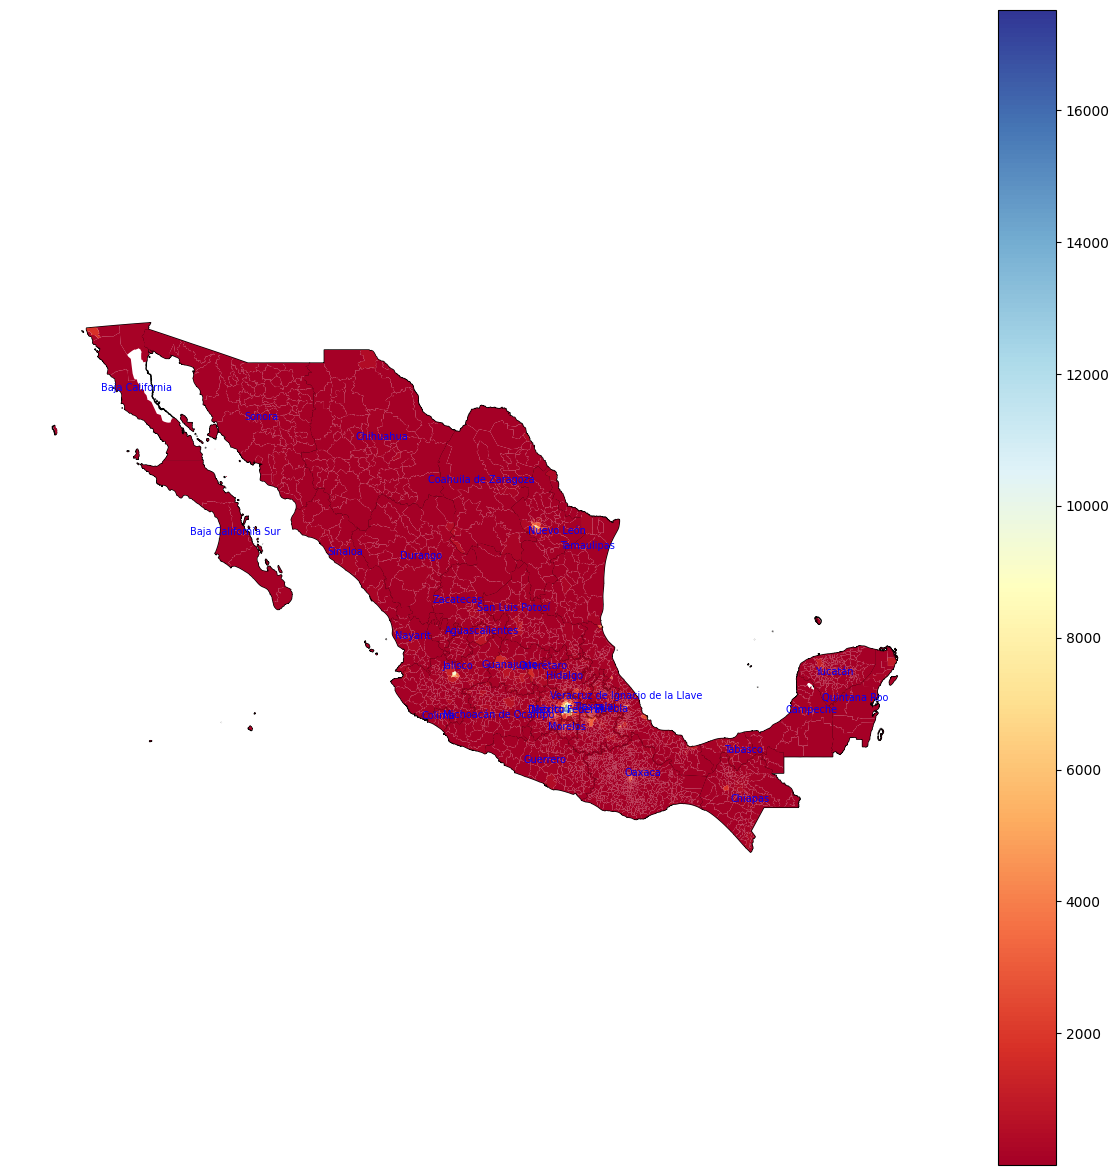

In [ ]:
#Código para visualizar un mapa de México con la densidad de población POR MUNICIPIO
# grafica el indicador a nivel municipal
## extrae las coordenadas de los políginos de entidades
base_i['coords'] = base_i['geometry'].apply(lambda x: x.representative_point().coords[:])
base_i['coords'] = [coords[0] for coords in base_i['coords']]
#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base_i.plot(color='white', edgecolor='black', ax=ax)
# muestra los nombres de las entidades
for idx, row in base_i.iterrows():
   plt.annotate(text=row['NOMBRE'], xy=row['coords'], horizontalalignment='center', color='blue', fontsize=7)
# mapa de los municipios con su densidad de población
layer_i.plot(column='DP_2020', categorical=False, legend=True, linewidth=0, ax=ax, cmap="RdYlBu")
# Remove axis
ax.set_axis_off()
plt.show()

## 05_Población No Económicamente Activa


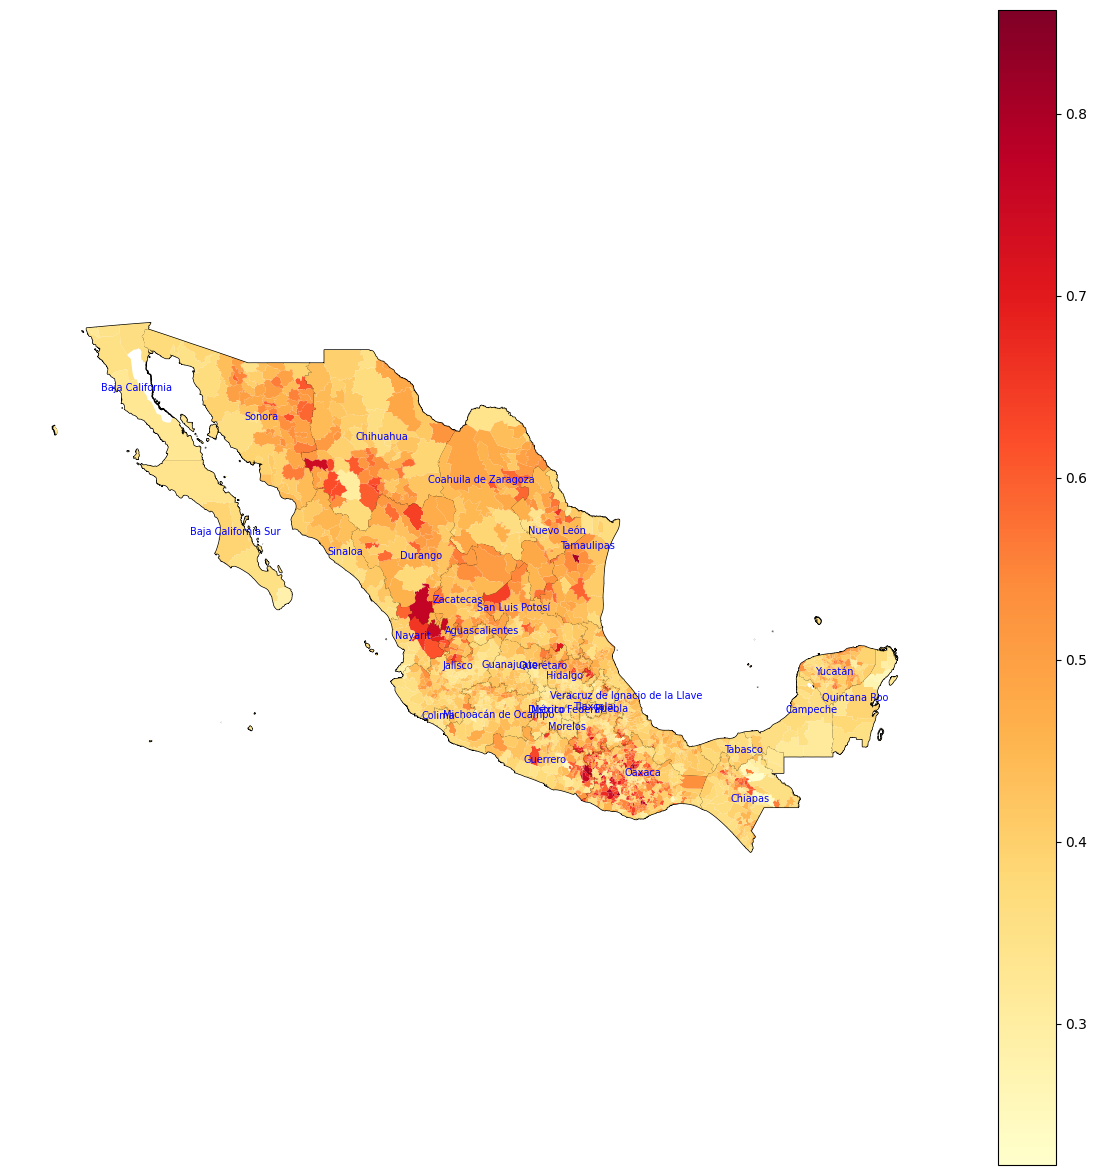

In [ ]:
#Código para visualizar un mapa de México con el % de población no económicamente activa POR MUNICIPIO
# grafica el indicador a nivel municipal
## extrae las coordenadas de los políginos de entidades
base_i['coords'] = base_i['geometry'].apply(lambda x: x.representative_point().coords[:])
base_i['coords'] = [coords[0] for coords in base_i['coords']]
#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base_i.plot(color='white', edgecolor='black', ax=ax)
# muestra los nombres de las entidades
for idx, row in base_i.iterrows():
   plt.annotate(text=row['NOMBRE'], xy=row['coords'], horizontalalignment='center', color='blue', fontsize=7)
# mapa de los municipios con su % de población no económicamente activa
layer_i.plot(column='PPNEA_2020', categorical=False, legend=True, linewidth=0, ax=ax, cmap="YlOrRd")
# Remove axis
ax.set_axis_off()
plt.show()

## 06_Armas aseguradas

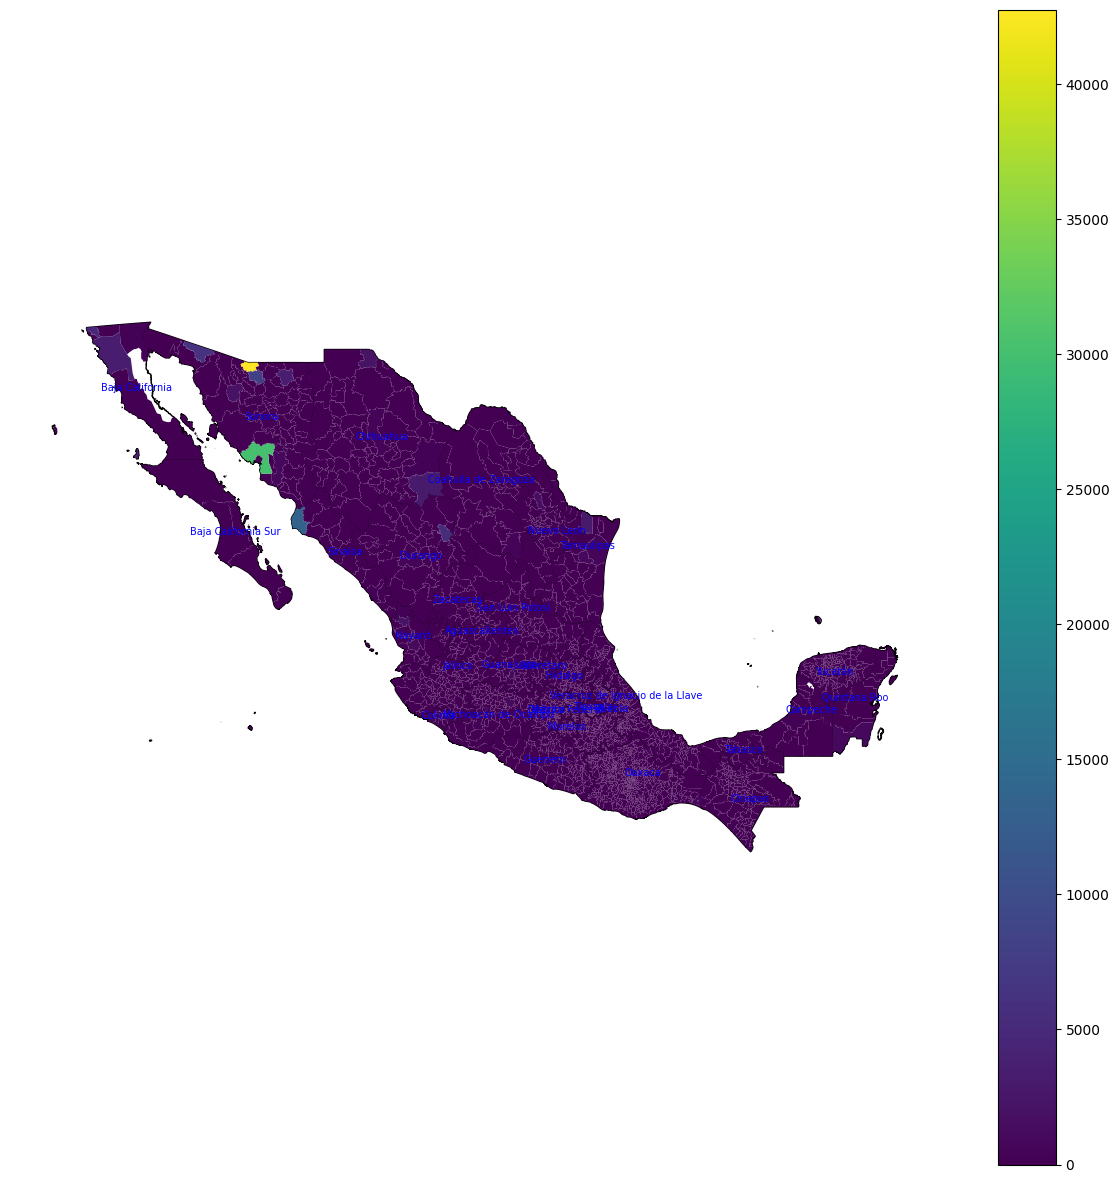

In [ ]:
#Código para visualizar un mapa de México con el # de armas aseguradas POR MUNICIPIO
# grafica el indicador a nivel municipal
## extrae las coordenadas de los políginos de entidades
base_i['coords'] = base_i['geometry'].apply(lambda x: x.representative_point().coords[:])
base_i['coords'] = [coords[0] for coords in base_i['coords']]
#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base_i.plot(color='white', edgecolor='black', ax=ax)
# muestra los nombres de las entidades
for idx, row in base_i.iterrows():
   plt.annotate(text=row['NOMBRE'], xy=row['coords'], horizontalalignment='center', color='blue', fontsize=7)
# mapa de los municipios con su el # de armas aseguradas
layer_i.plot(column='AA_2019', categorical=False, legend=True, linewidth=0, ax=ax, cmap="viridis")
# Remove axis
ax.set_axis_off()
plt.show()

## 07_Tasa de personas con seguro de social

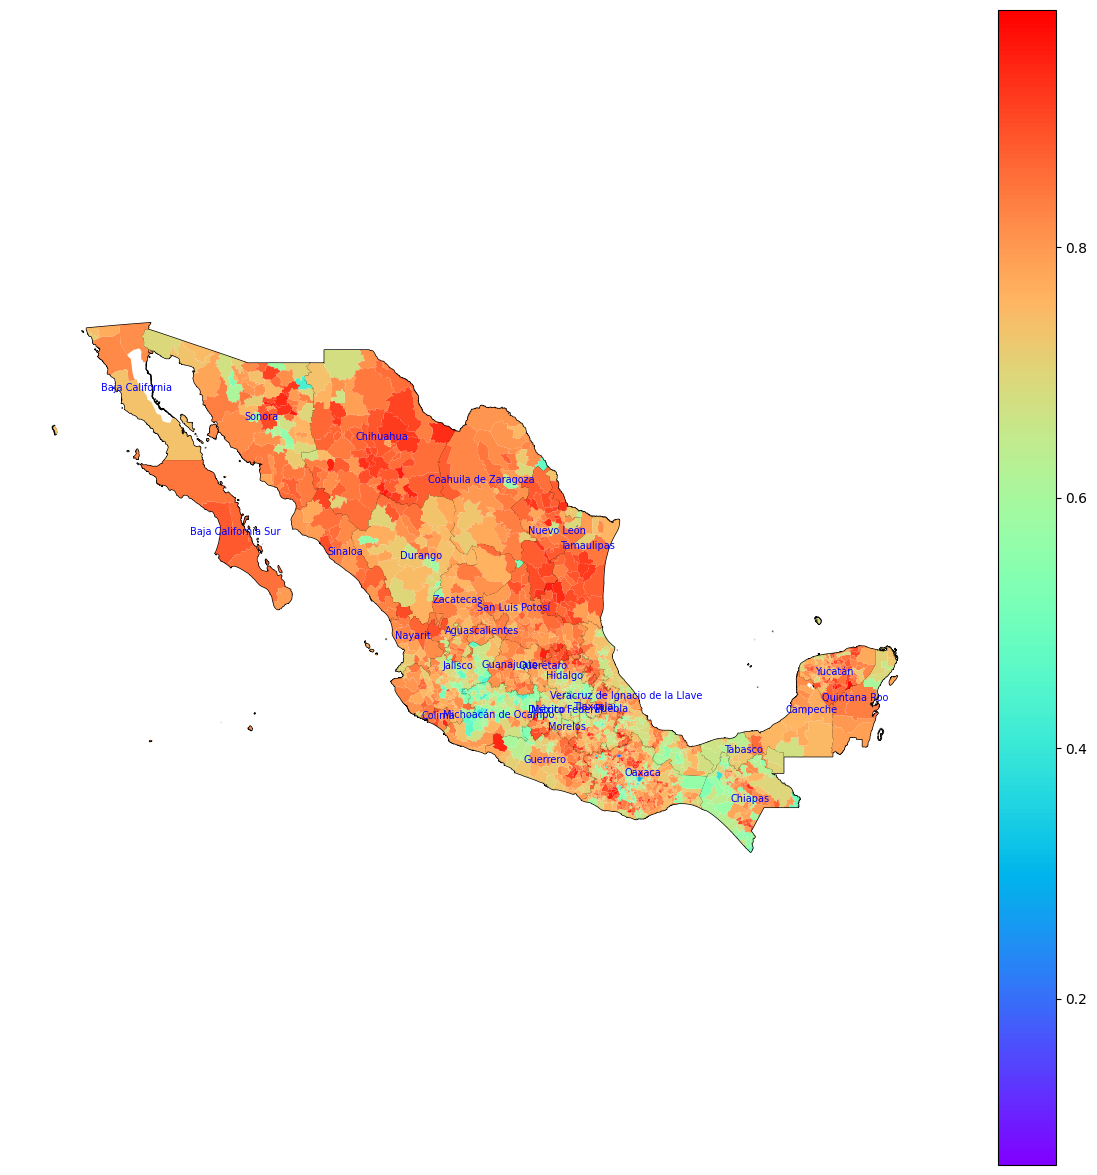

In [ ]:
#Código para visualizar un mapa de México con la tasa de personas con seguro social POR MUNICIPIO
# grafica el indicador a nivel municipal
## extrae las coordenadas de los políginos de entidades
base_i['coords'] = base_i['geometry'].apply(lambda x: x.representative_point().coords[:])
base_i['coords'] = [coords[0] for coords in base_i['coords']]
#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base_i.plot(color='white', edgecolor='black', ax=ax)
# muestra los nombres de las entidades
for idx, row in base_i.iterrows():
   plt.annotate(text=row['NOMBRE'], xy=row['coords'], horizontalalignment='center', color='blue', fontsize=7)
# mapa de los municipios con la tasa de personas con seguro social
layer_i.plot(column='TSS_2020', categorical=False, legend=True, linewidth=0, ax=ax, cmap="rainbow")
# Remove axis
ax.set_axis_off()
plt.show()

## 08_Tasa de personas migrantes

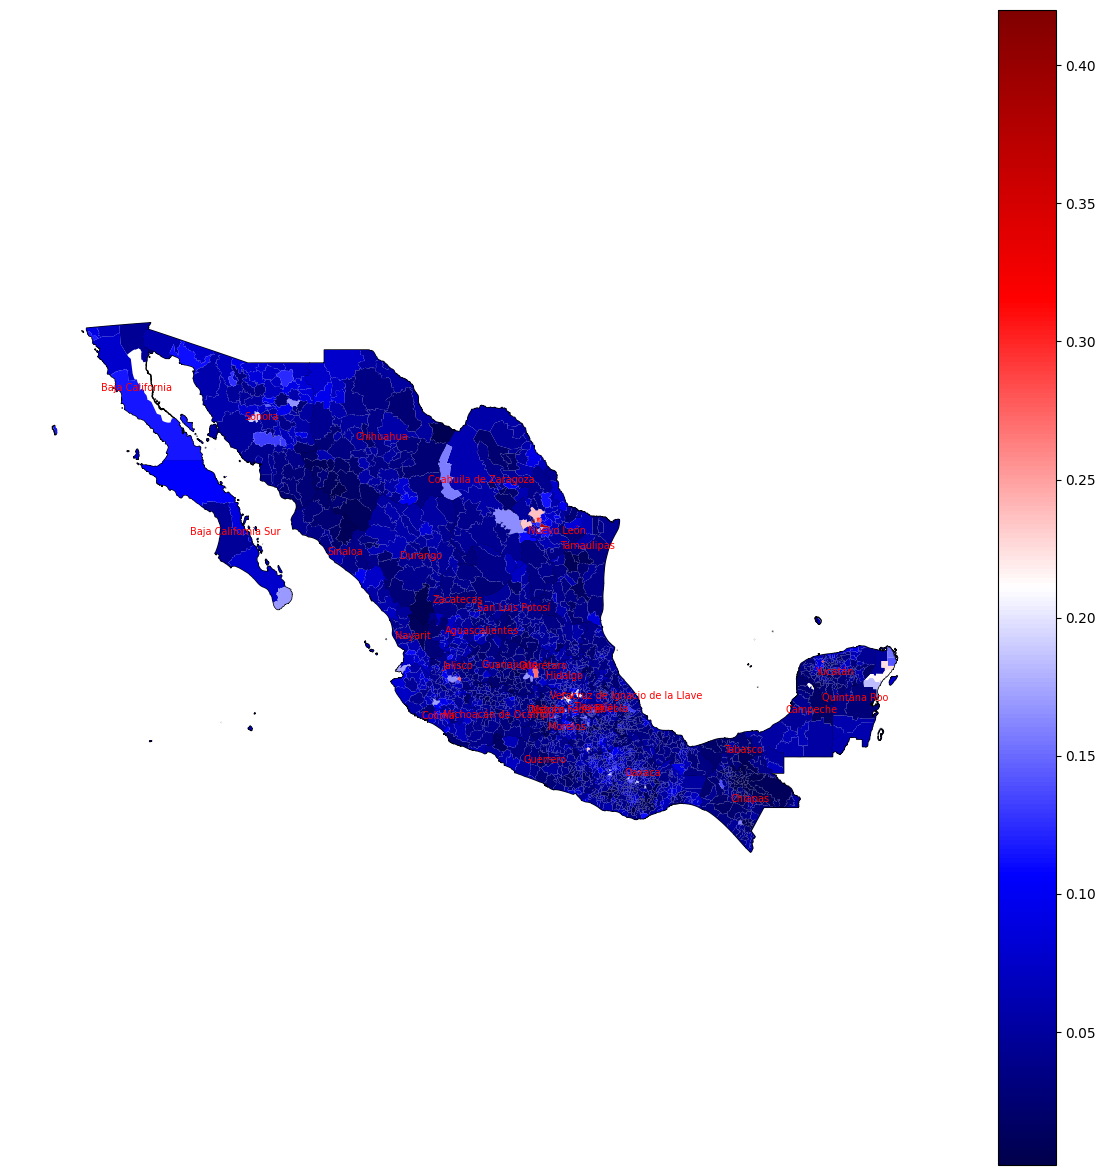

In [ ]:
#Código para visualizar un mapa de México con la tasa de personas migrantes POR MUNICIPIO
# grafica el indicador a nivel municipal
## extrae las coordenadas de los políginos de entidades
base_i['coords'] = base_i['geometry'].apply(lambda x: x.representative_point().coords[:])
base_i['coords'] = [coords[0] for coords in base_i['coords']]
#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base_i.plot(color='white', edgecolor='black', ax=ax)
# muestra los nombres de las entidades
for idx, row in base_i.iterrows():
   plt.annotate(text=row['NOMBRE'], xy=row['coords'], horizontalalignment='center', color='red', fontsize=7)
# mapa de los municipios con la tasa de personas migrantes
layer_i.plot(column='TM_2020', categorical=False, legend=True, linewidth=0, ax=ax, cmap="seismic")
# Remove axis
ax.set_axis_off()
plt.show()

## 09_Porcentaje de población discapacitada

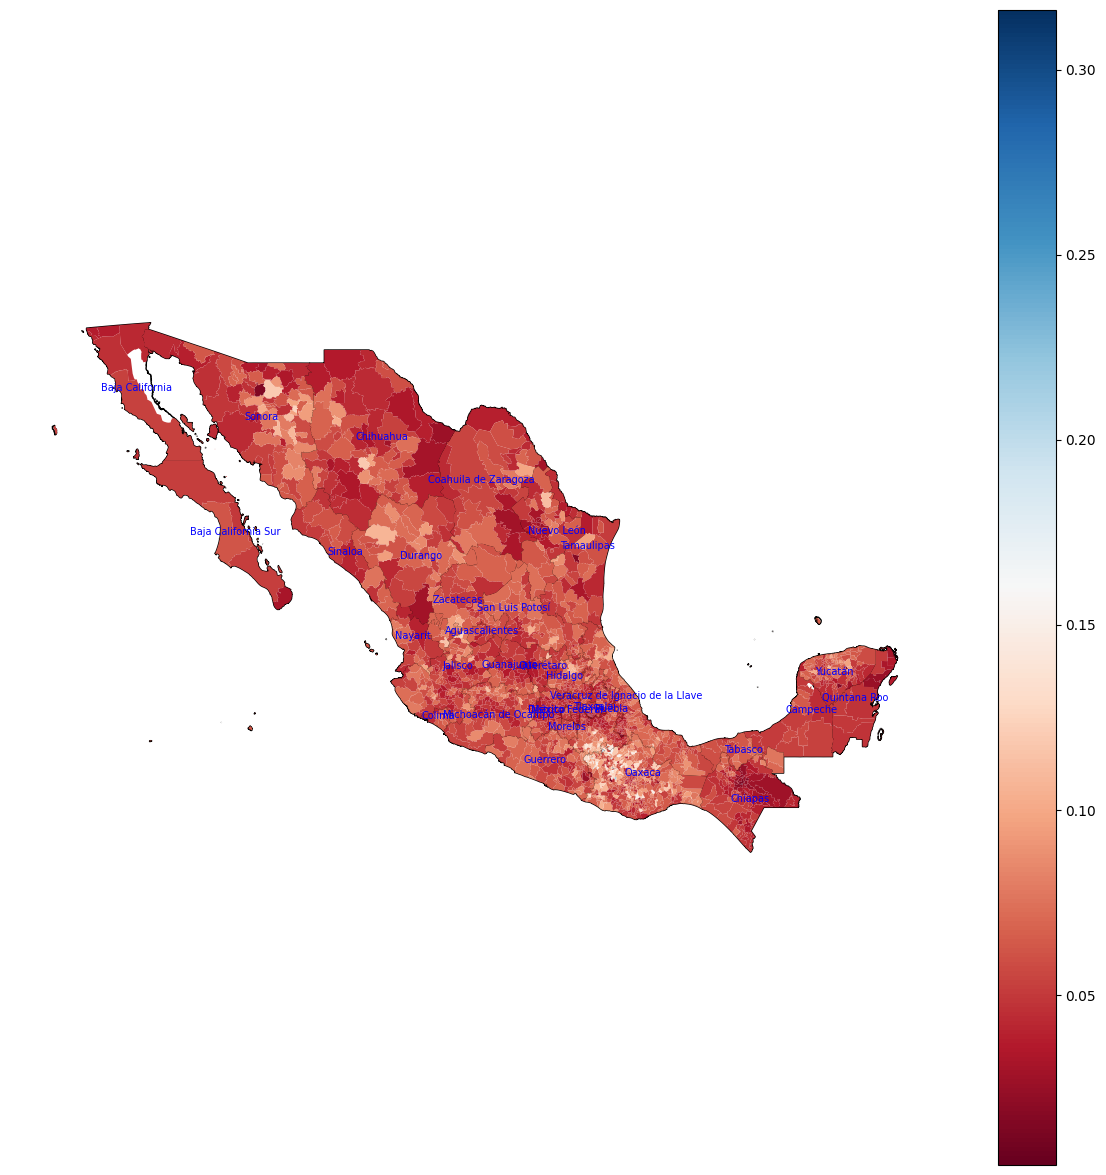

In [ ]:
#Código para visualizar un mapa de México con el % de población discapacitada POR MUNICIPIO
# grafica el indicador a nivel municipal
## extrae las coordenadas de los políginos de entidades
base_i['coords'] = base_i['geometry'].apply(lambda x: x.representative_point().coords[:])
base_i['coords'] = [coords[0] for coords in base_i['coords']]
#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base_i.plot(color='white', edgecolor='black', ax=ax)
# muestra los nombres de las entidades
for idx, row in base_i.iterrows():
   plt.annotate(text=row['NOMBRE'], xy=row['coords'], horizontalalignment='center', color='blue', fontsize=7)
# mapa de los municipios con el % de población discapacitada
layer_i.plot(column='PD_2020', categorical=False, legend=True, linewidth=0, ax=ax, cmap="RdBu")
# Remove axis
ax.set_axis_off()
plt.show()

## 10_Población que habla alguna lengua indígena

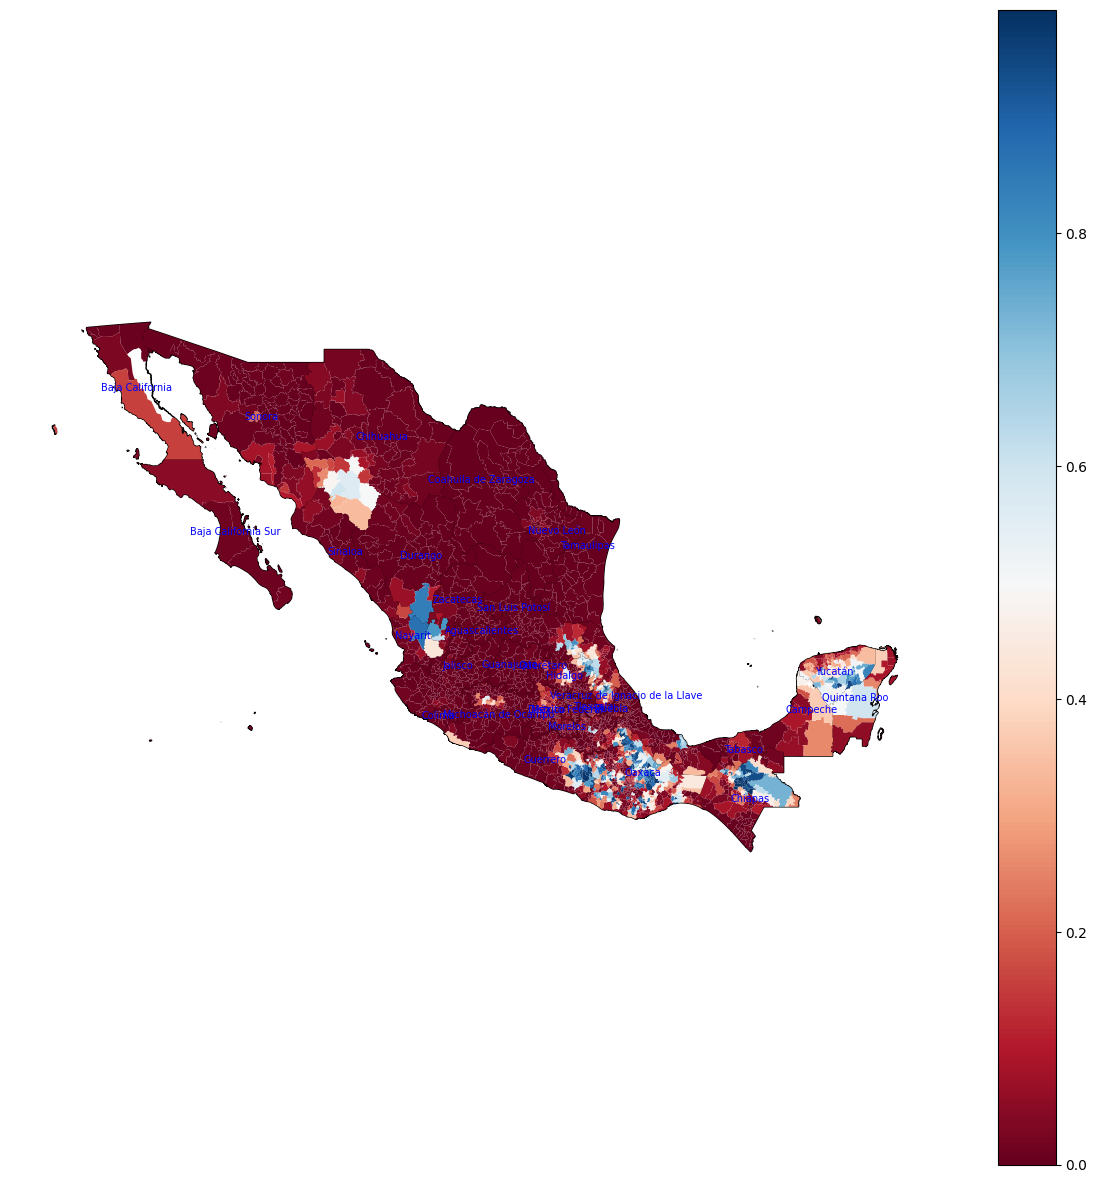

In [ ]:
#Código para visualizar un mapa de México con el % de población que hable alguna lengua indígena POR MUNICIPIO
# grafica el indicador a nivel municipal
## extrae las coordenadas de los políginos de entidades
base_i['coords'] = base_i['geometry'].apply(lambda x: x.representative_point().coords[:])
base_i['coords'] = [coords[0] for coords in base_i['coords']]
#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base_i.plot(color='white', edgecolor='black', ax=ax)
# muestra los nombres de las entidades
for idx, row in base_i.iterrows():
   plt.annotate(text=row['NOMBRE'], xy=row['coords'], horizontalalignment='center', color='blue', fontsize=7)
# mapa de los municipios con el % de población que hable alguna lengua indígena
layer_i.plot(column='PE_2020', categorical=False, legend=True, linewidth=0, ax=ax, cmap="RdBu")
# Remove axis
ax.set_axis_off()
plt.show()

## 11_Superficie

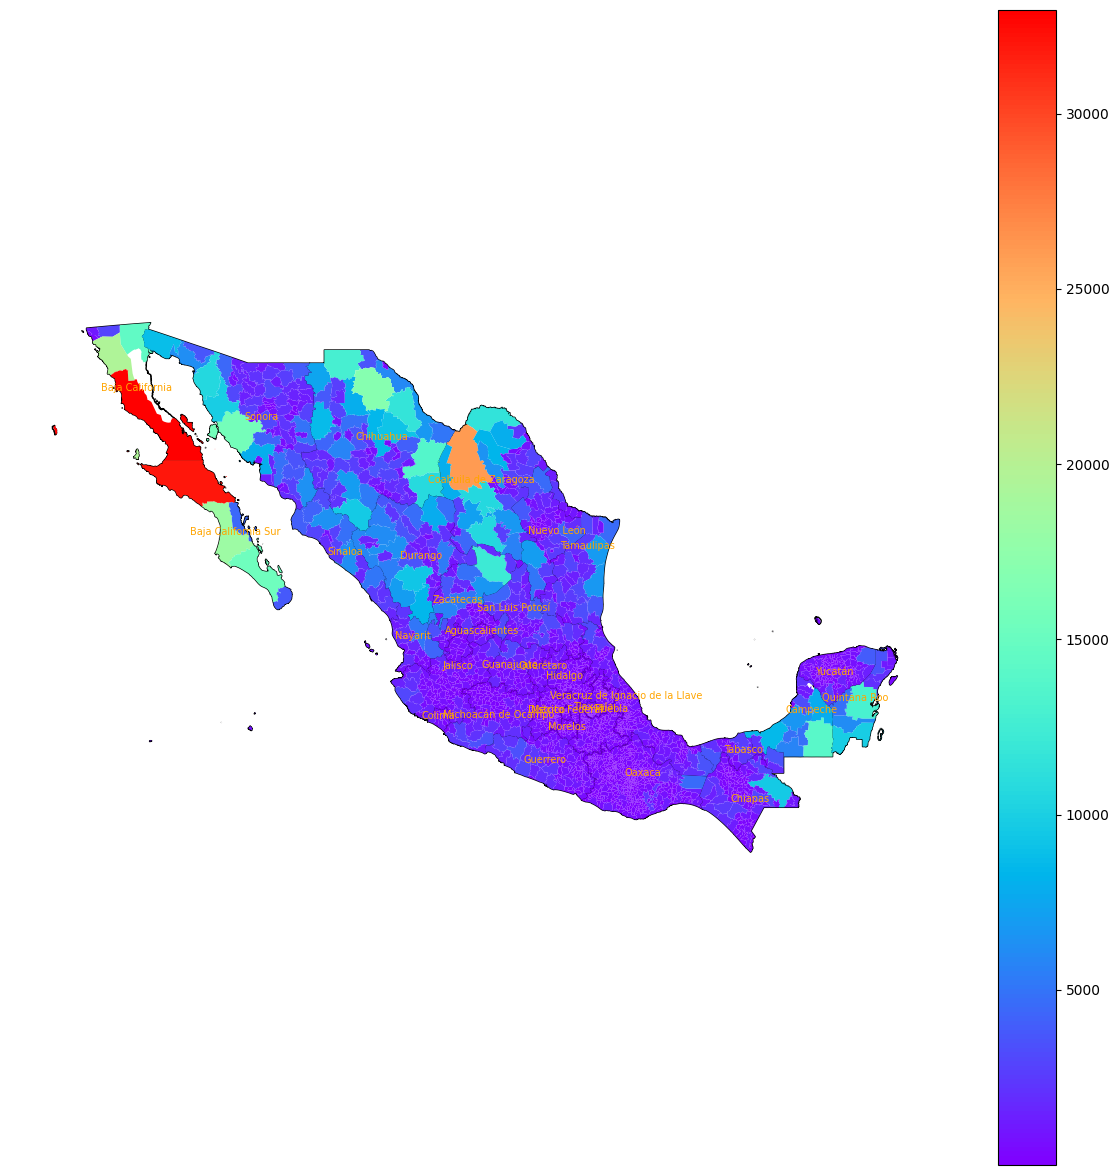

In [17]:
#Código para visualizar un mapa de México con la superficie (km) POR MUNICIPIO
# grafica el indicador a nivel municipal
## extrae las coordenadas de los políginos de entidades
base_i['coords'] = base_i['geometry'].apply(lambda x: x.representative_point().coords[:])
base_i['coords'] = [coords[0] for coords in base_i['coords']]
#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base_i.plot(color='white', edgecolor='black', ax=ax)
# muestra los nombres de las entidades
for idx, row in base_i.iterrows():
   plt.annotate(text=row['NOMBRE'], xy=row['coords'], horizontalalignment='center', color='orange', fontsize=7)
# mapa de los municipios con el la superficie (km)
layer_i.plot(column='S_2020', categorical=False, legend=True, linewidth=0, ax=ax, cmap="rainbow")
# Remove axis
ax.set_axis_off()
plt.show()

## 12_Población Total

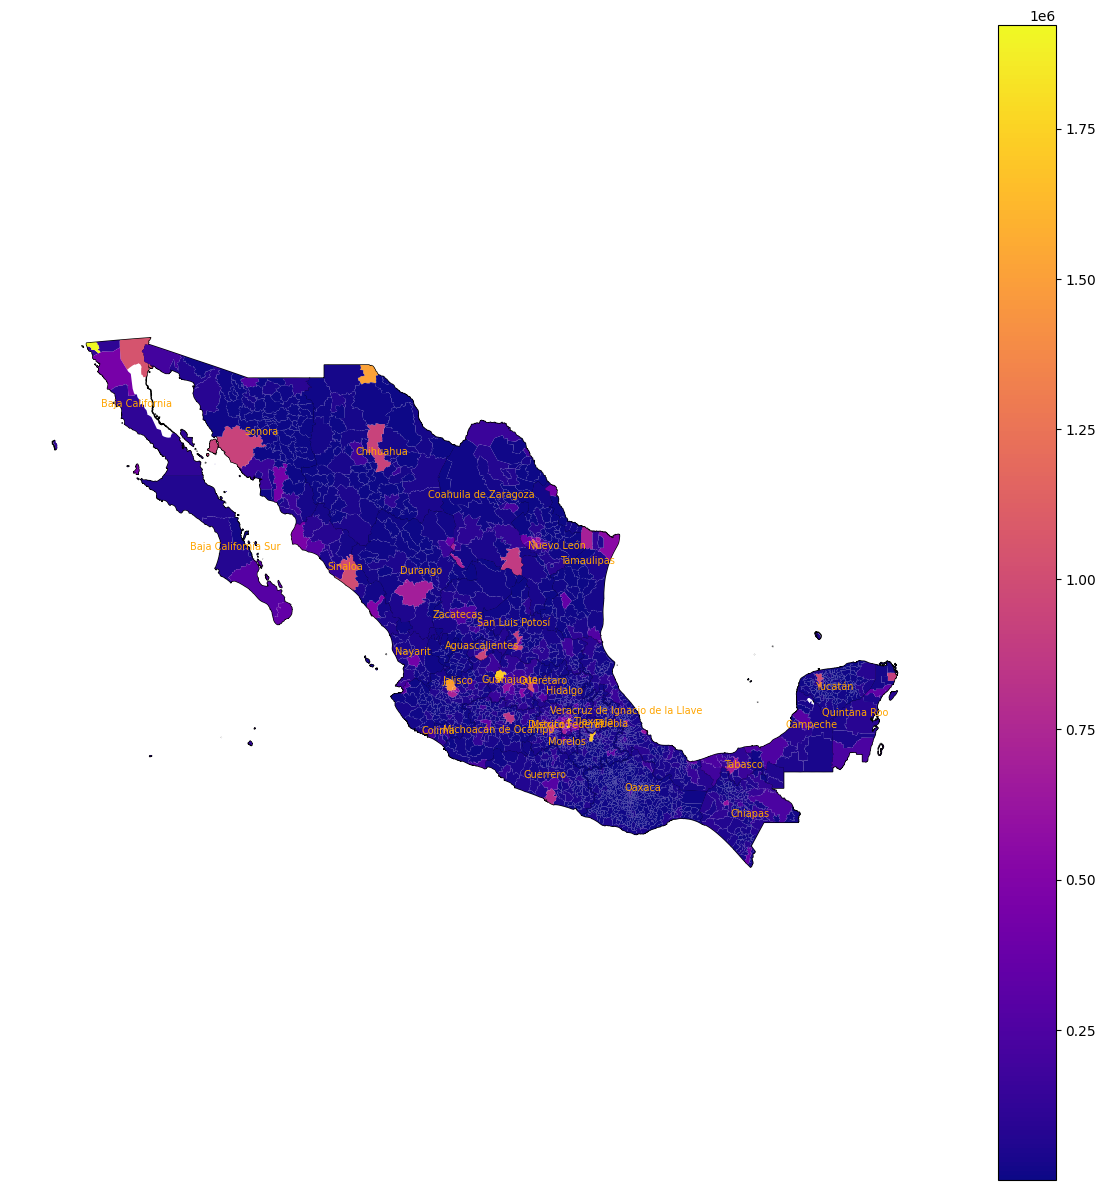

In [19]:
#Código para visualizar un mapa de México con la población total POR MUNICIPIO
# grafica el indicador a nivel municipal
## extrae las coordenadas de los políginos de entidades
base_i['coords'] = base_i['geometry'].apply(lambda x: x.representative_point().coords[:])
base_i['coords'] = [coords[0] for coords in base_i['coords']]
#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base_i.plot(color='white', edgecolor='black', ax=ax)
# muestra los nombres de las entidades
for idx, row in base_i.iterrows():
   plt.annotate(text=row['NOMBRE'], xy=row['coords'], horizontalalignment='center', color='orange', fontsize=7)
# mapa de los municipios con la población total
layer_i.plot(column='POB_TOT_2020', categorical=False, legend=True, linewidth=0, ax=ax, cmap="plasma")
# Remove axis
ax.set_axis_off()
plt.show()

# Visualización


In [59]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import robust_scale
from sklearn.preprocessing import RobustScaler
import matplotlib as mpl
import os
from sklearn.preprocessing import minmax_scale

sns.set() #ensure consistent styling throughout the visualizations
%matplotlib inline

Obtiene la información y quitamos cols innecesarias

In [89]:
data_dir = '/content/drive/MyDrive/ProgramaDelfín_23/Delfin 2023/Analisis delincuencia/data/' #ruta de directorio de los archivos de datos

fileindex = os.path.join(data_dir, 'vacio.xlsx') # datos de indicadores
bd = pd.read_excel(fileindex,sheet_name='datos') #DataFrame creado que contendrá los datos de los indicadores
NOM_MUN = bd["NOM_MUN"]
#preprocesamiento
bd = bd.drop(['CVE_ENT','NOM_ENT','NOM_MUN'], axis = 1)#eliminamos cols innecesarias
bd["CVE_MUN"] = bd["CVE_MUN"].astype(str)#cambiamos el índice a formato str
aux = bd[bd["CVE_MUN"].str.len() < 5] #obtengo el conjunto de datos a modificar
bd.loc[0:len(aux)-1, "CVE_MUN"] = '0' + aux["CVE_MUN"].astype(str)
bd.set_index('CVE_MUN', inplace=True)
cluster_variables = bd.columns.tolist()
n_covariables = len(cluster_variables)

Escalamos los datos

In [90]:
if type_scale == 'robust':
  X = RobustScaler().fit_transform(bd)#robust_scale(bd[cluster_variables])
elif type_scale == 'standard':
  X = StandardScaler().fit_transform(bd)

## Implementando sklearn para PCA

In [91]:
from sklearn.decomposition import PCA

pca = PCA()
# ajustar en los datos estandarizados
pca.fit(X)

dat = {'PC':range(1,n_covariables+1),'std':np.sqrt(pca.explained_variance_), 'var_prop':pca.explained_variance_ratio_,
       'cum_prop':np.cumsum(pca.explained_variance_ratio_)}

stds = pd.DataFrame(data = dat)
stds

PC       std  var_prop  cum_prop
0    1  1.652608  0.227501  0.227501
1    2  1.226944  0.125399  0.352899
2    3  1.202846  0.120521  0.473420
3    4  1.079955  0.097153  0.570573
4    5  0.989950  0.081634  0.652207
5    6  0.945231  0.074425  0.726632
6    7  0.884098  0.065109  0.791741
7    8  0.846546  0.059696  0.851437
8    9  0.784006  0.051201  0.902638
9   10  0.683982  0.038970  0.941608
10  11  0.639303  0.034045  0.975654
11  12  0.540625  0.024346  1.000000

Cada PC representa una combinación lineal de las variables originales en el conjunto de datos. Se ordenan de acuerdo con su importancia relativa, medida por la cantidad de varianza que explican en los datos (primer PC var relacionado con la mayor varianza). Ayudan a identificar patrones o relaciones entre las variables originales.

In [92]:
# componentes
comps = pd.DataFrame(data=pca.components_.T, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12'],
                     index=bd.columns)
print(comps)

                   pc1       pc2       pc3       pc4       pc5       pc6  \
IMN_2020     -0.479921 -0.022760  0.281106 -0.083450  0.013217  0.135699   
IG_2020       0.116969  0.120088  0.472819 -0.169758 -0.120632  0.653934   
PH_2020       0.138451  0.591739 -0.085203  0.061089 -0.199589 -0.182341   
DP_2020       0.298485 -0.383377  0.266758  0.377136 -0.179721 -0.074255   
PPNEA_2020   -0.440403  0.016259 -0.034901  0.337778 -0.098085  0.034557   
AA_2019       0.070479  0.136094  0.078799  0.259289  0.926109  0.027453   
TSS_2020     -0.233946  0.300589  0.099699  0.533712 -0.187477 -0.229674   
TM_2020       0.210456 -0.125768 -0.387491  0.261663 -0.052709  0.405907   
PD_2020      -0.239692 -0.110861 -0.409437  0.321937 -0.025855  0.454811   
PE_2020      -0.394490 -0.176447  0.366143  0.049548  0.055737 -0.014862   
S_2020        0.123356  0.537857  0.172731  0.134784 -0.026014  0.290660   
POB_TOT_2020  0.348563 -0.173948  0.346339  0.399184 -0.058827 -0.064643   

           

## Proyección de los datos en los componentes principales

Scatter matrix que demuestra la relación entre cada componente; la diagonal muestra la distribución univariada de la componente en respecto

In [93]:
proj = pd.DataFrame(pca.transform(X),columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12'])
#sns.set()
#sns.pairplot(proj, height=2);
proj

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0     3.880041 -0.723521  2.270601  2.369055 -0.643381 -0.249867 -1.014612   
1     0.302750  0.488145 -0.318620  0.233268 -0.168060 -0.867286 -0.152266   
2     0.588665  0.407702 -0.471544  0.089158 -0.131045 -0.106805 -0.368106   
3     0.335559  0.567519 -0.169308  0.411733  1.053275 -1.063640  0.102706   
4     2.117721  0.330045 -0.089004 -0.135056 -0.272629  0.140362  1.204961   
...        ...       ...       ...       ...       ...       ...       ...   
2464 -0.553103  0.444586 -0.268714  0.419258 -0.263417 -0.269787 -0.614559   
2465  0.516586  0.757215 -0.697601  0.032392 -0.063413 -0.196065 -0.556159   
2466  1.398581 -0.176402 -0.334477  0.467061 -0.146598 -0.317687  0.119756   
2467  0.302292  0.686713  0.318266 -0.181473 -0.274918 -0.537077 -0.143825   
2468 -0.415486  0.267025 -0.980597  0.862234 -0.297773 -0.255906  0.370759   

           pc8       pc9      pc10      pc11      pc12  
0     0.347863 -0.648377  1.628443 -3.479039  0.061366  
1    -0.293696 -0.813027  0.016716 -0.029724 -0.007237  
2    -0.248163 -0.602797  0.257568 -0.003039 -0.232334  
3    -0.695867 -0.963692 -0.290931  0.105565 -0.077680  
4    -0.257547 -0.753908  0.355214 -0.358415 -0.134627  
...        ...       ...       ...       ...       ...  
2464 -0.836687 -0.615208 -0.367435 -0.142001 -0.086134  
2465  0.326992 -0.067724 -0.228153  0.058927 -0.229802  
2466 -0.093409 -1.314778  0.118821 -0.388474 -0.449573  
2467 -1.024041 -1.096461 -0.129707  0.002740 -0.300012  
2468 -0.463077 -0.528659 -0.978571 -0.427572  0.002015  

[2469 rows x 12 columns]

In [94]:
import plotly.express as px

#pca_dataset = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'municipio': NOM_MUN})
pca_dataset = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'municipio': bd.index})
#NO ES NECESARIO-ELIMINARpca_dataset['municipio_str'] = pca_dataset['municipio'].astype(str) #agrego una col con la clave de los municipios en str
fig = px.scatter(pca_dataset, x='pc1', y='pc2', hover_data=['municipio'])
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()



In [ ]:
!pip install pca

[pca] >Plot PC1 vs PC2 with loadings.
IMN_2020       -0.479921
IG_2020         0.116969
PH_2020         0.138451
DP_2020         0.298485
PPNEA_2020     -0.440403
AA_2019         0.070479
TSS_2020       -0.233946
TM_2020         0.210456
PD_2020        -0.239692
PE_2020        -0.394490
S_2020          0.123356
POB_TOT_2020    0.348563
Name: pc1, dtype: float64


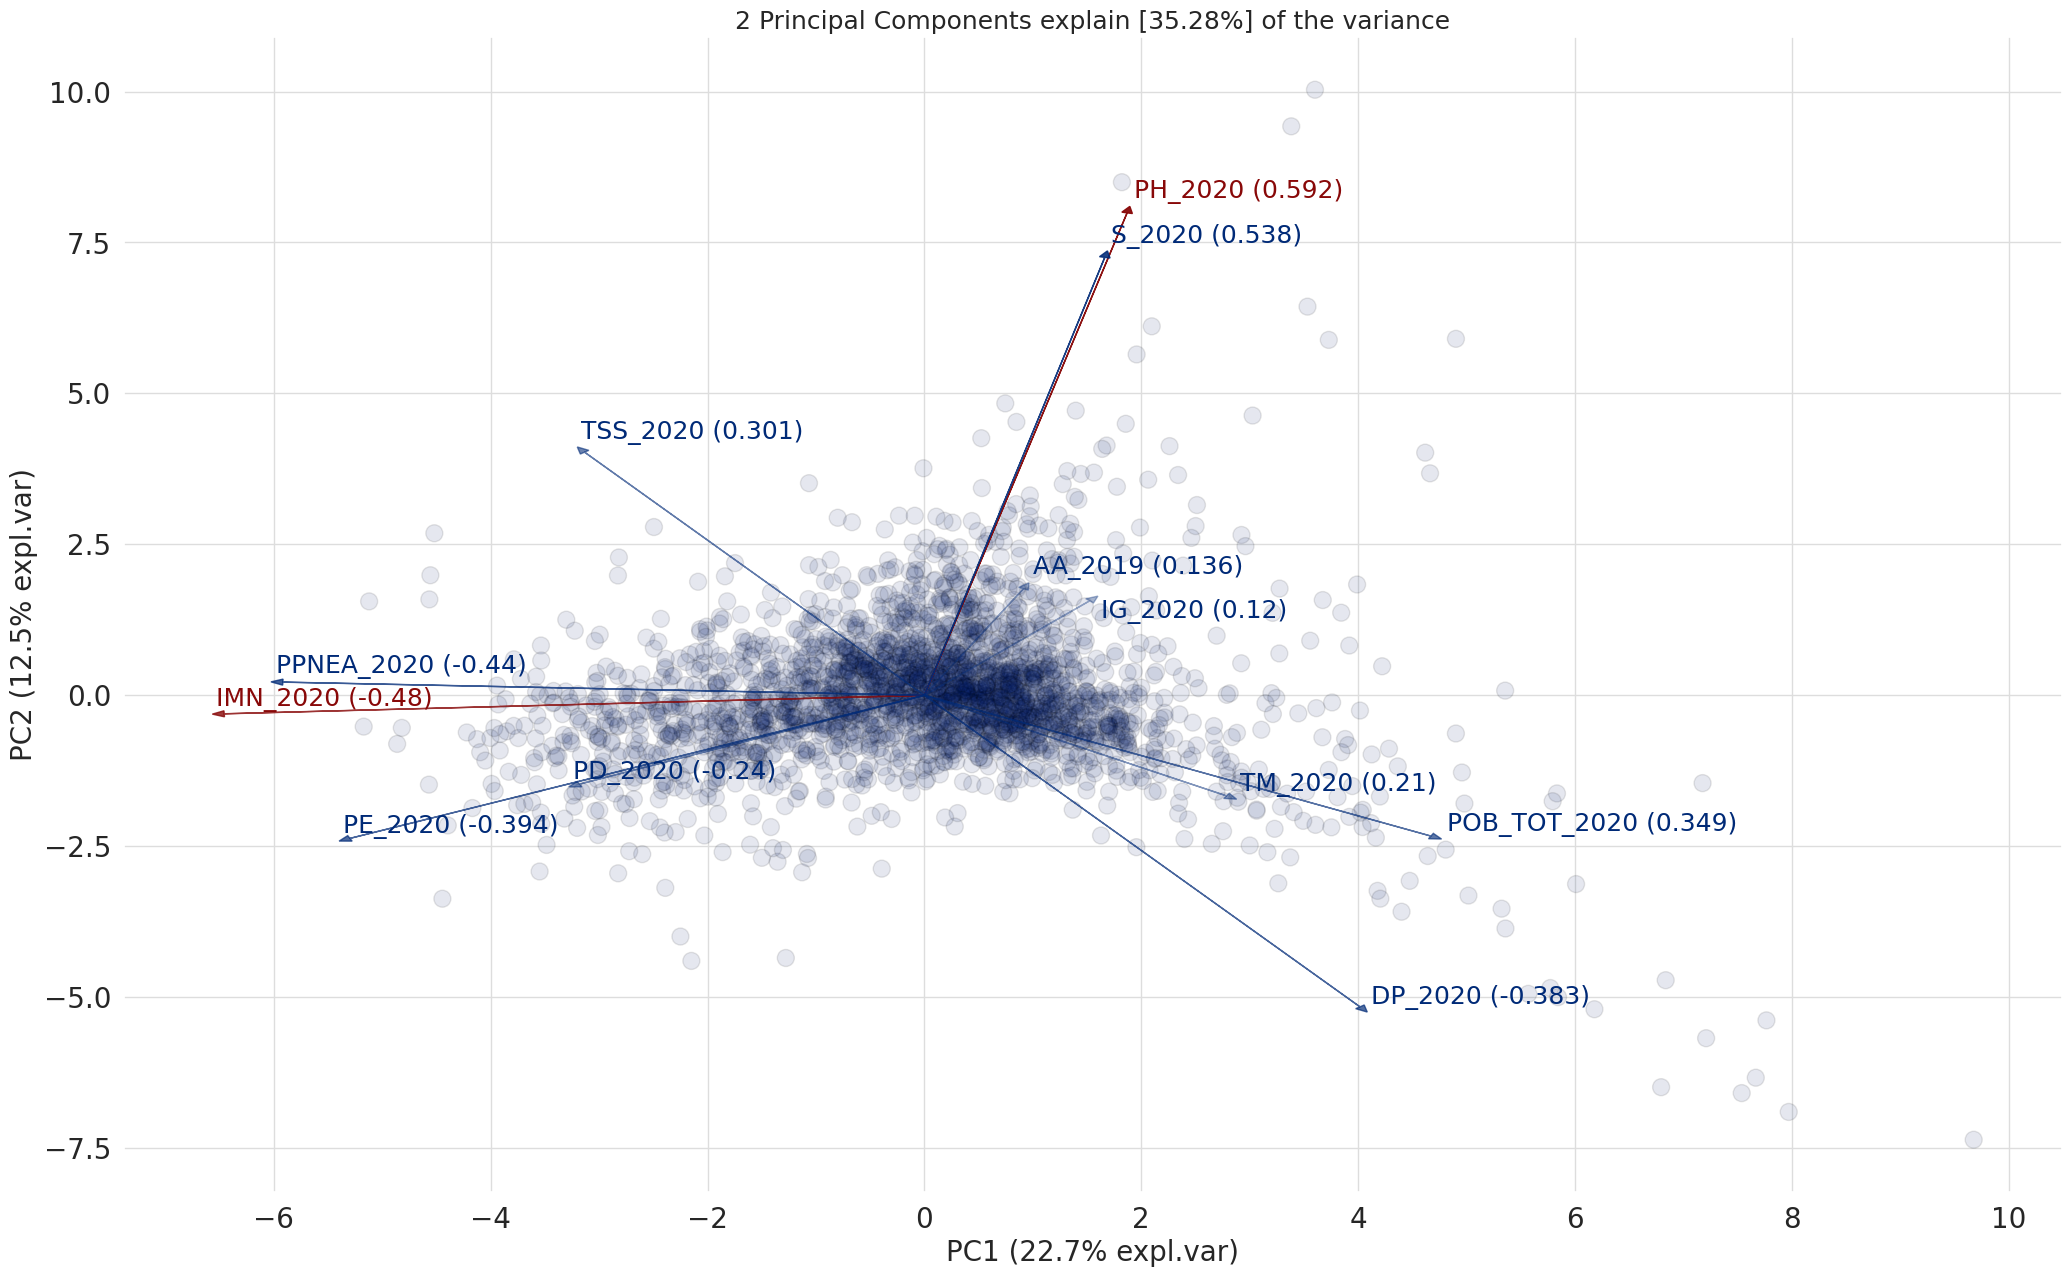

In [95]:
# usando el módulo pca (https://pypi.org/project/pca/)
from pca import pca
model = pca(n_components=2)

# Fit transform
results = model.fit_transform(X, row_labels=bd.index, col_labels=bd.columns, verbose=False)
fig, ax = model.biplot(n_feat=n_covariables,legend = False,alpha=0.1);

print(comps['pc1'])

Visualizamos en un mapa el PC1 normalizado.

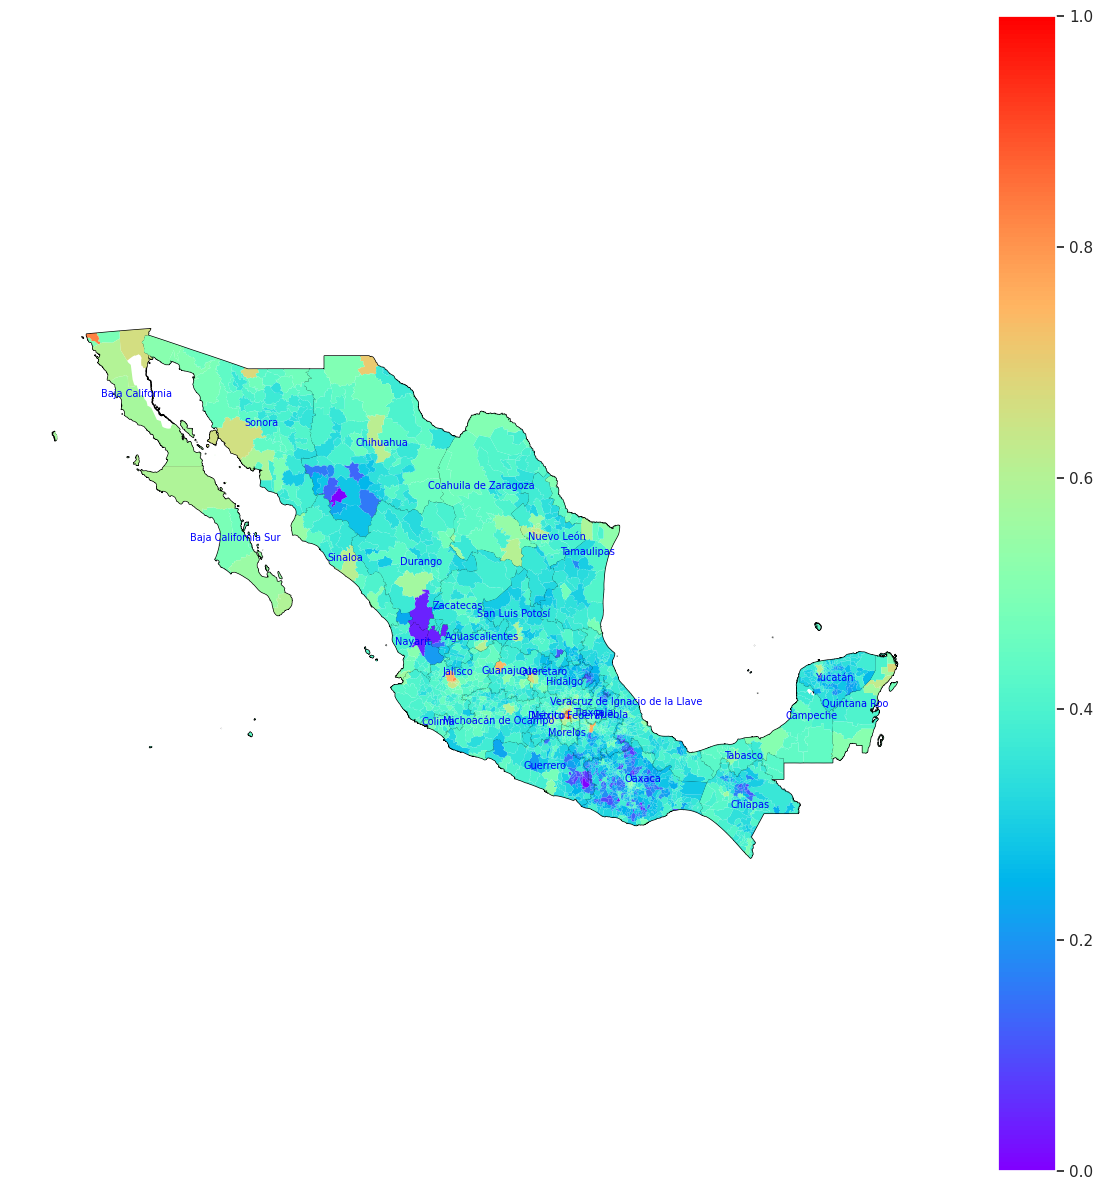

In [96]:
#Código para visualizar un mapa de México con la PC1 POR MUNICIPIO
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt

data_dir = '/content/drive/MyDrive/ProgramaDelfín_23/Delfin 2023/Analisis delincuencia/data/' #ruta de directorio de los archivos de datos

#LEE LA CARTOGRAFÍA DE ENTIDADES Y MUNICIPIOS DE MÉXICO
fileindex = os.path.join(data_dir, 'national/national_estatal.shp')
base = gpd.read_file(fileindex) #base del mapa --> mapa de México con sus delimitación geográfica
fileindex = os.path.join(data_dir, 'conjunto_de_datos/00mun.shp')
layer = gpd.read_file(fileindex,index = "CVEGEO")
layer= layer.to_crs("EPSG:4326") # corrige el sistema de coordenadas de referencia para los municipios --> utiliza latitud y longitud

#normalización de PC1
pca_dataset['pc1_n'] = minmax_scale(pca_dataset['pc1'])

# une la información cartográfica y del dataframe; utiliza el código de municipio (CVE_MUN) como clave de unión
layer = layer.merge(pca_dataset, left_on="CVEGEO",right_on='municipio')

# grafica el indicador a nivel municipal
## extrae las coordenadas de los políginos de entidades
base['coords'] = base['geometry'].apply(lambda x: x.representative_point().coords[:])
base['coords'] = [coords[0] for coords in base['coords']]
#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax)
# muestra los nombres de las entidades
for idx, row in base.iterrows():
   plt.annotate(text=row['NOMBRE'], xy=row['coords'], horizontalalignment='center', color='blue', fontsize=7)

# mapa de los municipios con su densidad de población
layer.plot(column='pc1_n', categorical=False,legend = True, linewidth=0, ax=ax, cmap="rainbow") #the values should not be treated as categorical data (continuous values).
# Remove axis
ax.set_axis_off()
plt.show()


# Clustering

### a) Dataset para clustering (PC1)

In [ ]:
c_ds = pd.DataFrame({'pc1': pca_dataset['pc1_n'], 'pc1': pca_dataset['pc1_n'], 'municipio': pca_dataset['municipio']})
c_ds.set_index('municipio', inplace=True)
title = "Cluster Map (PC1)"

## b) Dataset para clustering (PC1 & PC2)

In [ ]:
#CLUSTERING DATASET
pca_dataset['pc2_n'] = minmax_scale(pca_dataset['pc2']) #primero normalizamos pc2
c_ds = pd.DataFrame({'pc1': pca_dataset['pc1_n'], 'pc2': pca_dataset['pc2_n'], 'municipio': pca_dataset['municipio']})
c_ds.set_index('municipio', inplace=True)
title = "Cluster Map (PC1 & PC2)"

## c) Dataset para clustering (covariables principales de PC1)

Para ello debemos de conocer las 2 covariables principales de PC1

In [ ]:
print(abs(comps['pc1']).sort_values(ascending=False))
print(bd.columns.tolist())

AA_2019         1.000000
POB_TOT_2020    0.000401
S_2020          0.000269
IMN_2020        0.000047
PE_2020         0.000036
PD_2020         0.000033
PPNEA_2020      0.000030
PH_2020         0.000028
TM_2020         0.000017
TSS_2020        0.000015
IG_2020         0.000010
DP_2020         0.000008
Name: pc1, dtype: float64
['IMN_2020', 'IG_2020', 'PH_2020', 'DP_2020', 'PPNEA_2020', 'AA_2019', 'TSS_2020', 'TM_2020', 'PD_2020', 'PE_2020', 'S_2020', 'POB_TOT_2020']


In [ ]:
#CLUSTERING DATASET
cov1 = abs(comps['pc1']).sort_values(ascending=False).index[0]
cov2 = abs(comps['pc1']).sort_values(ascending=False).index[1]
pos_cov1 = cluster_variables.index(cov1)
pos_cov2 = cluster_variables.index(cov2)
c_ds = pd.DataFrame({cov1: X[:,pos_cov1], cov2: X[:,pos_cov2], 'municipio': bd.index})
c_ds.set_index('municipio', inplace=True)
title = f"Cluster Map ({cov1} & {cov2})"

## d) Dataset para clustering (X)

In [ ]:
#CLUSTERING DATASET
c_ds = pd.DataFrame({cluster_variables[0]: X[:,0], cluster_variables[1]: X[:,1],
                     cluster_variables[2]: X[:,2],cluster_variables[3]: X[:,3],
                     cluster_variables[4]: X[:,4],cluster_variables[5]: X[:,5],
                     cluster_variables[6]: X[:,6], cluster_variables[7]: X[:,7],
                     cluster_variables[8]: X[:,8], cluster_variables[9]: X[:,9],
                     cluster_variables[10]: X[:,10], cluster_variables[11]: X[:,11],
                     'municipio': bd.index})
c_ds.set_index('municipio', inplace=True)
title = "Cluster Map (X)"



## Elbow Method

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

Cálculo de las distorsiones y de la inercia.

1.   Distorsión: es el promedio de las distancias al cuadrado de los centroides a cada punto de observación.
2.   Inercia: es la sumatoria de las distancias al cuadrado de los puntos de observación al centroide más cercano

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(c_ds)
	kmeanModel.fit(c_ds)
  #kmeanModel.cluster_centers_ --> vector que almacena los centroides
	distortions.append(sum(np.min(cdist(c_ds, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / c_ds.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(c_ds, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / c_ds.shape[0]
	mapping2[k] = kmeanModel.inertia_


### Distorsión

Tabulando los resultados usando las distorsiones

1 : 0.05274171465704523
2 : 0.008621891897768264
3 : 0.004129506247954694
4 : 0.0015970470840726944
5 : 0.000683636551477805
6 : 0.0006200781100696577
7 : 0.0005633632140297463
8 : 0.0003658324982838743
9 : 0.0003360324916806543


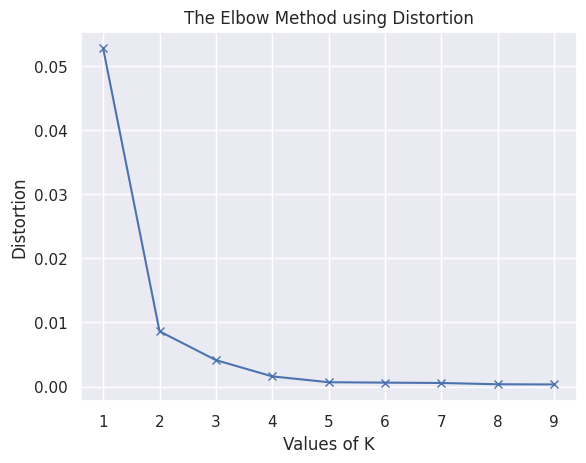

In [ ]:
for key, val in mapping1.items():
	print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


### Inercia

1 : 259.0732020989307
2 : 26.177304134368104
3 : 11.057547366225043
4 : 2.5774693486190787
5 : 0.0344819122192051
6 : 0.019249358522624466
7 : 0.012294527901532255
8 : 0.005527474718569575
9 : 0.003429200545755744


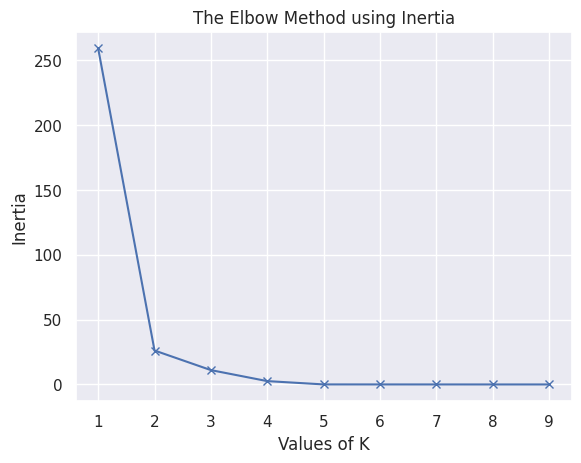

In [ ]:
for key, val in mapping2.items():
	print(f'{key} : {val}')
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


## K-means

Determina el número de clusters a partir de las distorsiones y/o inercia

In [ ]:
nc = 8

In [ ]:
# Initialize KMeans instance
from sklearn.cluster import KMeans

# Initialize KMeans instance
kmeans = KMeans(n_clusters=nc)

# Set the seed for reproducibility
#np.random.seed(1234)
# Run K-Means algorithm -->clusters have been assigned
kcls = kmeans.fit(c_ds)
#kcls.labels_[] --> label vector: Records the cluster to which each observation is assigned

# Assign labels into a column
c_ds["labels_kmeans"] = kcls.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




Cardinalidad de cada cluster


In [ ]:
# Group data table by cluster label and count observations
ksizes = c_ds.groupby("labels_kmeans").size()
print(ksizes)

labels_kmeans
0    2438
1       1
2       1
3       1
4       3
5       9
6      15
7       1
dtype: int64


## AHC (agglomerative hierarchical clustering)

El criterio de vinculación es de tipo ward, este minimiza la varainza de los clusters que se van a unir

In [ ]:
from sklearn.cluster import AgglomerativeClustering
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

# Set seed for reproducibility
#np.random.seed(0)
# Initialize the algorithm
model = AgglomerativeClustering(linkage="ward", n_clusters=nc)
# Run clustering
model.fit(c_ds)
# Assign labels to main data table
c_ds["labels_ahc"] = model.labels_



Cardinalidad de cada cluster

In [ ]:
wardsizes = c_ds.groupby("labels_ahc").size()
wardsizes

labels_ahc
0       9
1    2440
2       3
3       1
4       1
5       1
6      13
7       1
dtype: int64

Cluster Map (X)


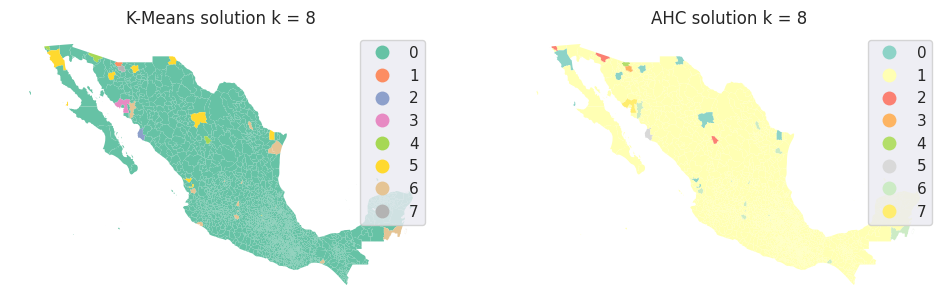

In [ ]:
data_dir = '/content/drive/MyDrive/ProgramaDelfín_23/Delfin 2023/Analisis delincuencia/data/' #ruta de directorio de los archivos de datos

#LEE LA CARTOGRAFÍA DE ENTIDADES Y MUNICIPIOS DE MÉXICO
fileindex = os.path.join(data_dir, 'national/national_estatal.shp')
base_c = gpd.read_file(fileindex) #base del mapa --> mapa de México con sus delimitación geográfica
fileindex = os.path.join(data_dir, 'conjunto_de_datos/00mun.shp')
layer_c = gpd.read_file(fileindex,index = "CVEGEO")
layer_c= layer_c.to_crs("EPSG:4326") # corrige el sistema de coordenadas de referencia para los municipios --> utiliza latitud y longitud

# une la información cartográfica y del dataframe; utiliza el código de municipio como clave de unión
layer_c = layer_c.merge(c_ds, left_on="CVEGEO",right_on=c_ds.index)
print(title)
# Set up figure and ax
f, axs = plt.subplots(1, 2, figsize=(12, 6))

### K-Means ###
ax = axs[0]
# Plot unique values choropleth including
# a legend and with no boundary lines
layer_c.plot(
    column="labels_kmeans",
    categorical=True,
    cmap="Set2",
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Add title
ax.set_title(f"K-Means solution k = {nc}")

### AHC ###
ax = axs[1]
# Plot unique values choropleth including
# a legend and with no boundary lines
layer_c.plot(
    column="labels_ahc",
    categorical=True,
    cmap="Set3",
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Add title
ax.set_title(f"AHC solution k = {nc}")
# Display the map
plt.show()

# Regionalization

 Para asegurar que los clusters no esten espacialmente fragmentados se hace uso de la regionalización. Es decir, el algoritmo de regionalización impone una restricción espacial. Para implementar esto con scikit-learn, se debe hacer uso de una matriz de "pesos espaciales" como una opción de conexión entre observaciones; esto parámetro extra forzará a que el algoritmo solo agrupe observaciones en un cluster si estan espacialmente conectados.  


---


**Para poder discriminar algunas regiones, se debe correr primero la sección de visualización para tener los componentes de PCA**


In [ ]:
pip install libpysal

In [97]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from libpysal.weights import Queen, KNN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import robust_scale
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

data_dir = '/content/drive/MyDrive/ProgramaDelfín_23/Delfin 2023/Analisis delincuencia/data/' #ruta de directorio de los archivos de datos

#LEE LA CARTOGRAFÍA DE ENTIDADES Y MUNICIPIOS DE MÉXICO
fileindex = os.path.join(data_dir, 'national/national_estatal.shp')
base = gpd.read_file(fileindex) #base del mapa --> mapa de México con sus delimitación geográfica
fileindex = os.path.join(data_dir, 'conjunto_de_datos/00mun.shp')
layer = gpd.read_file(fileindex,index = "CVEGEO")
layer= layer.to_crs("EPSG:4326") # corrige el sistema de coordenadas de referencia para los municipios --> utiliza latitud y longitud

#LEE LA BD
fileindex = os.path.join(data_dir, 'vacio.xlsx') # datos de indicadores
bd = pd.read_excel(fileindex,sheet_name='datos') #DataFrame creado que contendrá los datos de los indicadores


#preprocesamiento
bd = bd.drop(['CVE_ENT','NOM_ENT','NOM_MUN'], axis = 1)#eliminamos cols innecesarias
bd["CVE_MUN"] = bd["CVE_MUN"].astype(str)#cambiamos el índice a formato str
aux = bd[bd["CVE_MUN"].str.len() < 5] #obtengo el conjunto de datos a modificar
bd.loc[0:len(aux)-1, "CVE_MUN"] = '0' + aux["CVE_MUN"].astype(str)


## a) Dataset para regionalización (X)

In [98]:
bd.set_index('CVE_MUN', inplace=True)

In [99]:
cluster_variables = bd.columns.tolist()
n_covariables = len(cluster_variables)

In [100]:
if type_scale == 'robust':
  X = RobustScaler().fit_transform(bd)#robust_scale(bd[cluster_variables])
elif type_scale == 'standard':
  X = StandardScaler().fit_transform(bd)

#Regionalization DATASET
r_ds = pd.DataFrame({cluster_variables[0]: X[:,0], cluster_variables[1]: X[:,1],
                     cluster_variables[2]: X[:,2],cluster_variables[3]: X[:,3],
                     cluster_variables[4]: X[:,4],cluster_variables[5]: X[:,5],
                     cluster_variables[6]: X[:,6], cluster_variables[7]: X[:,7],
                     cluster_variables[8]: X[:,8], cluster_variables[9]: X[:,9],
                     cluster_variables[10]: X[:,10], cluster_variables[11]: X[:,11],
                     'municipio': bd.index})
r_ds.set_index('municipio', inplace=True)
title = "Regionalization Map (X)"


## b) Dataset para regionalización (X|Y)

In [ ]:
data_dir = '/content/drive/MyDrive/ProgramaDelfín_23/Delfin 2023/Analisis delincuencia/data/' #ruta de directorio de los archivos de datos
fileindex = os.path.join(data_dir, '00_indice_delictivo.xlsx') # datos de indicadores
bd_delitos = pd.read_excel(fileindex,sheet_name='homicidios') #DataFrame creado que contendrá los datos de los indicadores

#preprocesamiento
bd_delitos = bd_delitos.drop(['Year','Clave_Ent','Entidad','Bien jurídico afectado','Tipo de delito','Subtipo de delito',
              'Modalidad','Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto'
              ,'Septiembre','Octubre','Noviembre','Diciembre'], axis = 1)#eliminamos cols innecesarias
bd_delitos["Cve. Municipio"] = bd_delitos["Cve. Municipio"].astype(str)#cambiamos el índice a formato str
aux = bd_delitos[bd_delitos["Cve. Municipio"].str.len() < 5] #obtengo el conjunto de datos a modificar
bd_delitos.loc[0:len(aux)-1, "Cve. Municipio"] = '0' + aux["Cve. Municipio"].astype(str)
bd_delitos.rename(columns={'Total': 'ID_2020'}, inplace=True)

In [ ]:
#la suma de los grupos dados los municipios
grupo = bd_delitos.groupby('Cve. Municipio')['ID_2020'].sum()
grupo

bd = bd.merge(grupo, left_on="CVE_MUN",right_on="Cve. Municipio")

#estandarizarlos por cada 10 mil habitantes
bd["ID_2020"] = bd["ID_2020"]/bd["POB_TOT_2020"]*10000

print(len(bd[bd["ID_2020"] == 0])) #cuenta los municipios que no tienen homicidios registrados

58


In [ ]:
bd.set_index('CVE_MUN', inplace=True)

In [ ]:
cluster_variables = bd.columns.tolist()
n_covariables = len(cluster_variables)

In [ ]:
if type_scale == 'robust':
  X = RobustScaler().fit_transform(bd)#robust_scale(bd[cluster_variables])
elif type_scale == 'standard':
  X = StandardScaler().fit_transform(bd)

#Regionalization DATASET
r_ds = pd.DataFrame({'ID_2020':X[:,12],
                     cluster_variables[0]: X[:,0], cluster_variables[1]: X[:,1],
                     cluster_variables[2]: X[:,2],cluster_variables[3]: X[:,3],
                     cluster_variables[4]: X[:,4],cluster_variables[5]: X[:,5],
                     cluster_variables[6]: X[:,6], cluster_variables[7]: X[:,7],
                     cluster_variables[8]: X[:,8], cluster_variables[9]: X[:,9],
                     cluster_variables[10]: X[:,10], cluster_variables[11]: X[:,11],
                     'municipio': bd.index})
r_ds.set_index('municipio', inplace=True)
title = "Regionalization Map (X|Y)"

## Implementando KNN

A continuación, se determina la matriz de k-nearest neighbor, donde cada observación se conecta con sus k observaciones más cercanas

In [101]:
layer = layer.merge(r_ds, left_on="CVEGEO",right_on=r_ds.index)

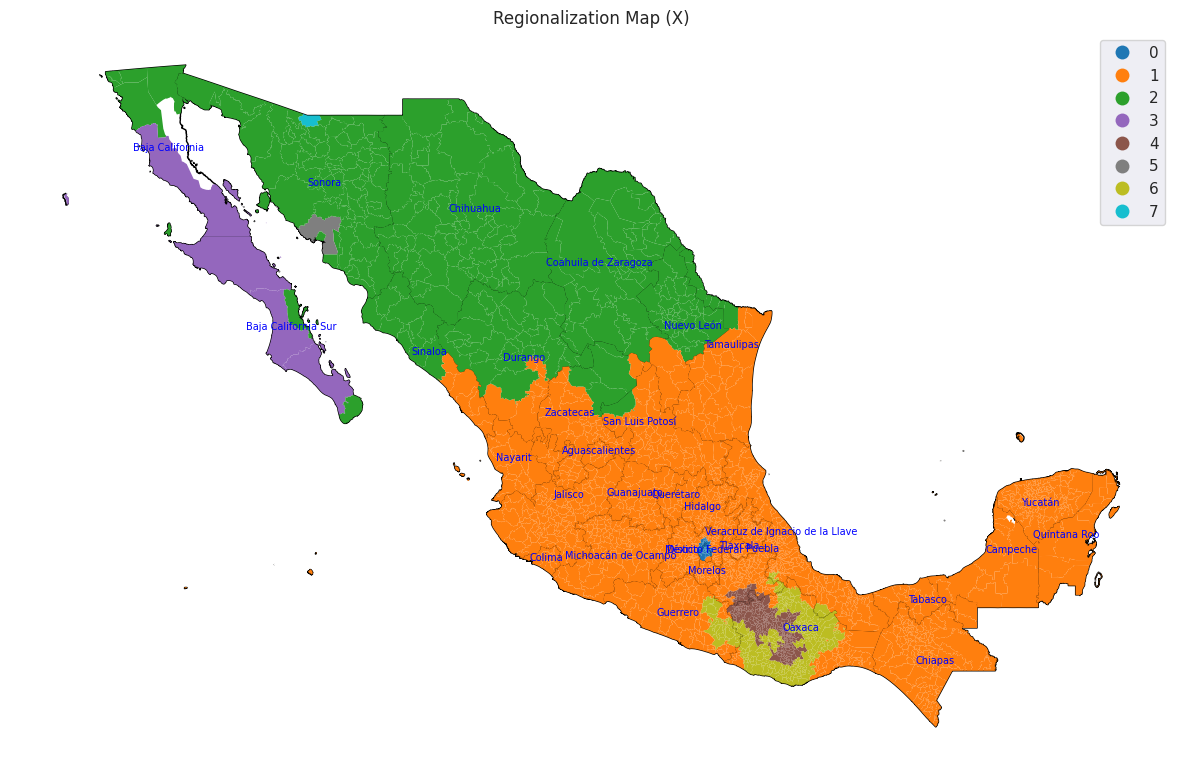

In [102]:
from libpysal.weights import Queen, KNN
nc = 8
# Queen contiguity matrix
#w = Queen.from_dataframe(layer)

#spatial k-nearest neighbor matrix; each observation is connected to its k nearest observations
k_ = 3
w = KNN.from_dataframe(layer, k=k_)
# Set the seed for reproducibility
#numpy.random.seed(123456)
# Specify cluster model with spatial constraint
model = AgglomerativeClustering(
    linkage="ward", connectivity=w.sparse, n_clusters=nc
) #Connectivity matrix
# Fit algorithm to the data
model.fit(layer[cluster_variables])

layer["labels_r"] = model.labels_

# grafica el indicador a nivel municipal
## extrae las coordenadas de los políginos de entidades
base['coords'] = base['geometry'].apply(lambda x: x.representative_point().coords[:])
base['coords'] = [coords[0] for coords in base['coords']]
#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax)
# muestra los nombres de las entidades
for idx, row in base.iterrows():
   plt.annotate(text=row['NOMBRE'], xy=row['coords'], horizontalalignment='center', color='blue', fontsize=7)

# Plot unique values choropleth including a legend and with no boundary lines
layer.plot(
    column="labels_r",
    categorical=True,
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.title(title)
plt.show()

## Regiones atípicas

In [38]:
rsizes = layer.groupby("labels_r").size()
rsizes

labels_r
0      32
1    1580
2     281
3       4
4     293
5       1
6     277
7       1
dtype: int64

Datos de las regiones atípicas

In [39]:
rows = layer[layer["labels_r"] == 5]
print(pca_dataset[pca_dataset["municipio"].isin(rows["CVEGEO"])])
print(rows[["CVEGEO","NOMGEO"]])
print("-----------------------------")
rows = layer[layer["labels_r"] == 7]
print(pca_dataset[pca_dataset["municipio"].isin(rows["CVEGEO"])])
print(rows[["CVEGEO","NOMGEO"]])

           pc1       pc2 municipio     pc1_n
1929  3.533227  6.437012     26029  0.586219
     CVEGEO   NOMGEO
1944  26029  Guaymas
-----------------------------
           pc1      pc2 municipio     pc1_n
1943  4.902161  5.90399     26043  0.678414
     CVEGEO   NOMGEO
1933  26043  Nogales


## Segmentación de las regiones

Seleccionamos las regiones de interés (aquellas que tengan más de 3 municipios)

In [40]:
bdr = []
min_regiones = 3 #numero de regiones que no son atípicas
c_ok = rsizes[rsizes > min_regiones]
for r in range(len(c_ok)):
    bdaux = layer[layer["labels_r"] == c_ok.index[r]]
    bdaux.set_index('CVEGEO', inplace=True)
    bdr.append(bdaux)


In [41]:
len(bdr)

6

In [42]:
print(bdr[0].shape)
print(bdr[1].shape)
print(bdr[2].shape)
print(bdr[3].shape)
print(bdr[4].shape)
print(bdr[5].shape)

rsizes

(32, 17)
(1580, 17)
(281, 17)
(4, 17)
(293, 17)
(277, 17)


labels_r
0      32
1    1580
2     281
3       4
4     293
5       1
6     277
7       1
dtype: int64

# Random Forest

Algoritmo supervisado de machine learning que hace uso de árboles de decisión. En pocas palabras, este algoritmo crea un conjunto de árboles de decisión a partir de un subconjunto del conjunto de entrenamiento. Después colecciona los votos de diferentes árboles de decisión para decidir la predicción final.

## Implementación de Random Forest

In [103]:
data_dir = '/content/drive/MyDrive/ProgramaDelfín_23/Delfin 2023/Analisis delincuencia/data/' #ruta de directorio de los archivos de datos
fileindex = os.path.join(data_dir, '00_indice_delictivo.xlsx') # datos de indicadores
bd_delitos = pd.read_excel(fileindex,sheet_name='homicidios') #DataFrame creado que contendrá los datos de los indicadores

#preprocesamiento
bd_delitos = bd_delitos.drop(['Year','Clave_Ent','Entidad','Bien jurídico afectado','Tipo de delito','Subtipo de delito',
              'Modalidad','Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto'
              ,'Septiembre','Octubre','Noviembre','Diciembre'], axis = 1)#eliminamos cols innecesarias
bd_delitos["Cve. Municipio"] = bd_delitos["Cve. Municipio"].astype(str)#cambiamos el índice a formato str
aux = bd_delitos[bd_delitos["Cve. Municipio"].str.len() < 5] #obtengo el conjunto de datos a modificar
bd_delitos.loc[0:len(aux)-1, "Cve. Municipio"] = '0' + aux["Cve. Municipio"].astype(str)
bd_delitos.rename(columns={'Total': 'ID_2020'}, inplace=True)

In [104]:
#LEE LA BD
fileindex = os.path.join(data_dir, 'vacio.xlsx') # datos de indicadores
indice_delictivo = pd.read_excel(fileindex,sheet_name='datos') #DataFrame creado que contendrá los datos de los indicadores

#preprocesamiento
indice_delictivo["CVE_MUN"] = indice_delictivo["CVE_MUN"].astype(str)#cambiamos el índice a formato str
aux = indice_delictivo[indice_delictivo["CVE_MUN"].str.len() < 5] #obtengo el conjunto de datos a modificar
indice_delictivo.loc[0:len(aux)-1, "CVE_MUN"] = '0' + aux["CVE_MUN"].astype(str)
indice_delictivo.set_index('CVE_MUN', inplace=True)
indice_delictivo = indice_delictivo[['POB_TOT_2020']]

In [105]:
#la suma de los grupos dados los municipios
grupo = bd_delitos.groupby('Cve. Municipio')['ID_2020'].sum()
grupo = grupo.loc[indice_delictivo.index]
indice_delictivo = indice_delictivo.merge(grupo, left_on=indice_delictivo.index,right_on=grupo.index)
indice_delictivo.rename(columns={'key_0': 'CVE_MUN'}, inplace=True)
indice_delictivo.set_index('CVE_MUN', inplace=True)

#estandarizarlos por cada 10 mil habitantes
indice_delictivo["ID_2020"] = indice_delictivo["ID_2020"]/indice_delictivo["POB_TOT_2020"]*10000

indice_delictivo = indice_delictivo.drop(["POB_TOT_2020"], axis = 1)

### a) Región centro


Probando específicamente con la la región 0 [centro]

Obs 32


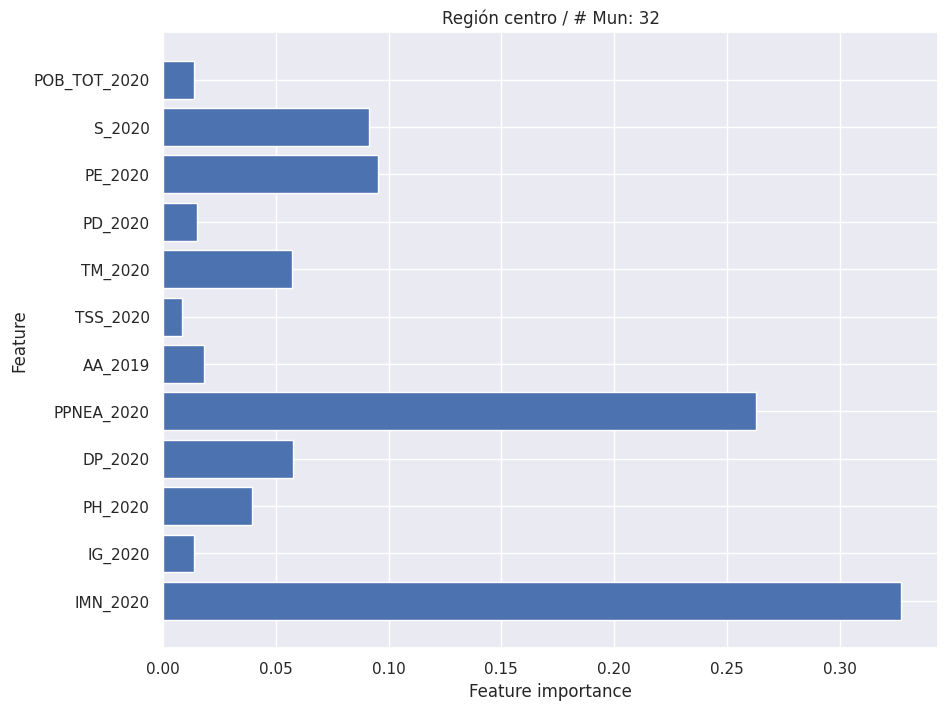

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn import metrics
import math
X_centro = bdr[0][cluster_variables]
y = indice_delictivo.loc[X_centro.index]["ID_2020"]
print(f"Obs {len(X_centro)}")
X_train, X_test, y_train, y_test = train_test_split(X_centro, y, test_size = 0.30)
# creating a RF classifier
#se construyen n_dt árboles de decisión que se van a construir en el bosque aleatorio
n_dt = 1000
clf = RandomForestRegressor(n_estimators = n_dt)
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing PREDICTIONS on the test dataset
y_pred = clf.predict(X_test)

# using metrics module for accuracy calculation
accuracy = metrics.mean_squared_error(y_test, y_pred)
#print(f"ACCURACY OF THE MODEL: {accuracy}" )

feature_imp = pd.Series(clf.feature_importances_, index = cluster_variables).sort_values(ascending = False)
#print(feature_imp)

plt.rcParams['figure.figsize'] = (10, 8)
plt.barh(np.arange(n_covariables), clf.feature_importances_, align='center')
plt.yticks(np.arange(n_covariables), cluster_variables)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_covariables)
plt.title(f"Región centro / # Mun: {len(X_centro)}")
plt.show()

**Residuales:** los residuales se computan usando la data de entrenamiento y para evaluar la calidad se analiza el comportamiento de los residuales para un grupo de observaciones.

In [ ]:
pip install dalex


In [108]:
import dalex as dx

clf_exp = dx.Explainer(clf, X_train, y_train)

md_rf = clf_exp.model_diagnostics()
md_rf.result

Preparation of a new explainer is initiated

  -> data              : 22 rows 12 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 22 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7c0f25018430> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.78e+02, mean = 2.42e+02, max = 4.88e+02
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



  -> residuals         : min = -52.8, mean = 0.00408, max = 1.29e+02
  -> model_info        : package sklearn

A new explainer has been created!


IMN_2020   IG_2020   PH_2020    DP_2020  PPNEA_2020   AA_2019  \
CVEGEO                                                                  
09008  -1.467227  1.814809 -0.674332   2.944244   -0.904308 -0.059017   
09005  -1.571941  0.994599 -0.487977  10.673002   -0.708430 -0.032432   
09011  -1.375461  0.926248 -0.214200   3.488641   -0.901629 -0.059017   
09013  -1.178747  1.711995 -0.054749   2.919887   -0.903118 -0.059017   
15070  -0.892147  0.618295 -0.047377   6.464797   -0.911437 -0.059017   
15037  -1.343013  1.822468 -0.596878   1.400410   -1.006073 -0.059017   
15020  -1.791035  0.252413 -0.468665   6.604549   -0.680262 -0.059017   
09004  -1.661607  1.767735 -0.626046   2.252382   -1.205035  0.140367   
09010  -1.673106  2.076408 -0.813194   6.227690   -1.087961 -0.059017   
09003  -1.772984  1.615371 -1.139096   9.074743   -0.844668 -0.059017   
09007  -1.431674  1.291899 -0.291068  13.023434   -0.938074 -0.047497   
15108  -1.476037  0.314602  0.076478   4.568397   -1.001949 -0.059017   
15058  -1.398603  0.728422 -0.352535  13.683739   -0.778825 -0.059017   
09016  -1.861232  1.278396 -1.068682   7.055507   -1.438001 -0.059017   
15122  -0.995567  0.247058 -0.087443   6.619058   -1.007636 -0.059017   
09015  -1.888661  1.702004 -0.652167  13.485051   -1.666010 -0.059017   
15031  -0.985295  0.456890  0.033891  10.276590   -0.814717 -0.059017   
09017  -1.646861  1.106022 -0.942475  10.472486   -1.074660  1.139054   
15121  -1.710493  1.036577 -0.235481   3.876325   -0.746696 -0.027115   
15013  -1.559729  1.381124 -0.269111   4.364397   -0.822369 -0.059017   
09006  -1.661629  1.067067 -0.829270  14.089967   -1.006625 -0.051041   
15024  -1.664454  0.392714  0.134589   3.330781   -1.061065 -0.058130   

        TSS_2020   TM_2020   PD_2020   PE_2020    S_2020  POB_TOT_2020  \
CVEGEO                                                                   
09008  -0.310904  0.015160 -0.280425 -0.574672 -0.375340      1.337658   
09005  -0.127392 -0.023482 -0.178836 -0.573115 -0.362761      7.636807   
09011  -0.275126  0.411112 -0.382933 -0.571897 -0.363817      2.322212   
09013  -0.625557 -0.097021 -0.425161 -0.530348 -0.349297      2.661520   
15070  -1.418686  1.014812 -0.377900 -0.496764 -0.388882      1.721883   
15037  -0.660881  0.103451 -1.165305 -0.566857 -0.335388      1.591760   
15020  -0.264493  0.594428 -0.582743 -0.595876 -0.389922      1.649455   
09004  -0.020869  0.517603 -1.090509 -0.582451 -0.371365      1.133958   
09010  -0.059905  0.279935 -0.503072 -0.576404 -0.358658      4.818276   
09003  -0.180579  0.902965 -0.276827 -0.571690 -0.380218      3.833729   
09007  -0.744875 -0.289565 -0.244236 -0.560439 -0.349786     12.142324   
15108  -0.663877  0.654750 -0.875871 -0.583218 -0.394166      0.725407   
15058  -1.064107 -0.454084 -0.306969 -0.573069 -0.375418      6.982600   
09016   0.318335  2.697923 -0.793708 -0.584937 -0.384069      2.472980   
15122  -1.720599  0.199430 -0.341508 -0.516236 -0.383946      2.318252   
09015  -0.369259  1.777640 -0.382965 -0.557346 -0.391209      3.367190   
15031  -1.783516 -0.185595 -0.590788 -0.512009 -0.379756      4.451213   
09017  -0.372001  0.587638 -0.223841 -0.576317 -0.390522      2.671904   
15121  -0.280224  0.132201 -0.708622 -0.588197 -0.351372      3.430330   
15013  -0.498821  0.002732 -0.878333 -0.571496 -0.360219      3.216062   
09006  -0.274766  1.113195 -0.106410 -0.577416 -0.396053      2.406466   
15024  -0.229565  1.955714 -1.028940 -0.589232 -0.386927      0.869677   

                 y       y_hat   residuals  abs_residuals  \
CVEGEO                                                      
09008   177.569037  182.520258   -4.951221       4.951221   
09005   198.082245  204.034374   -5.952129       5.952129   
09011   178.530918  184.580901   -6.049984       6.049984   
09013   169.614951  178.318897   -8.703946       8.703946   
15070   218.884007  223.965234   -5.081227       5.081227   
15037   186.268489  185.403712    0.864777       0.

In [52]:
#we can specify what shall be presented on horizontal and vertical axes
#Possible values are columns in the md_rf.result data frame; i.e. residuals, abs_residuals, y, y_hat, ids and variable names
md_rf.plot(variable = "y_hat", yvariable = "residuals")

### b) Todas las regiones

Probando con todas las regiones.

**Residuales**: los residuales se computan usando la data de entrenamiento y para evaluar la calidad se analiza el comportamiento de los residuales para un grupo de observaciones. Los posibles valores para graficar residuales son las columnas del dataframe md_rf.result (i.e. residuals, abs_residuals, y, y_hat, ids and variable names)

Obs 32


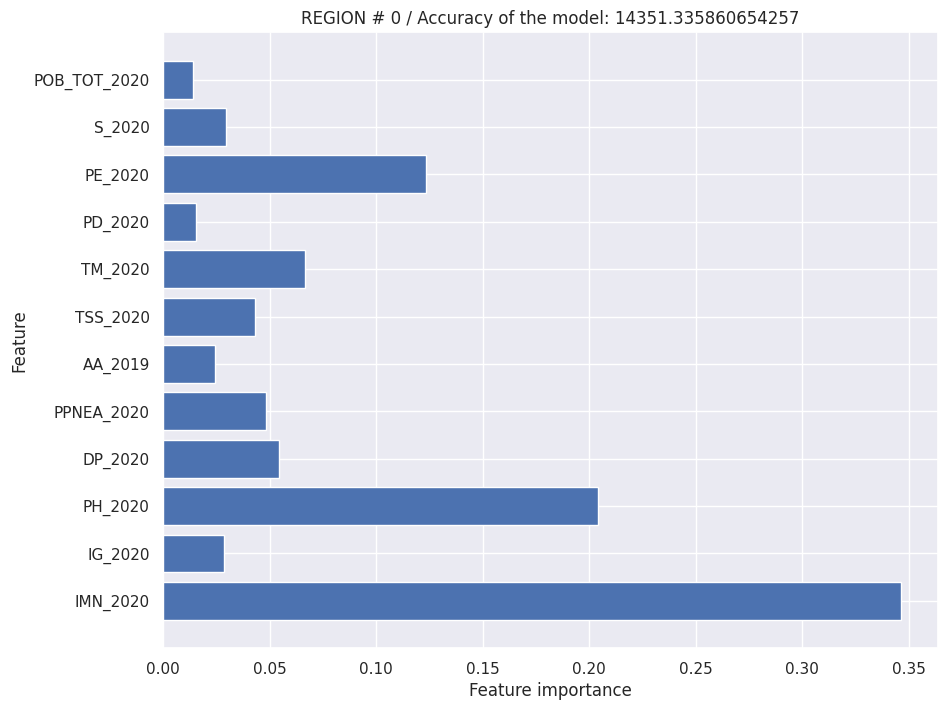

Preparation of a new explainer is initiated

  -> data              : 22 rows 12 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 22 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7c0f25018430> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.89e+02, mean = 2.35e+02, max = 3.39e+02
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



  -> residuals         : min = -20.4, mean = 0.905, max = 30.3
  -> model_info        : package sklearn

A new explainer has been created!


Obs 1580


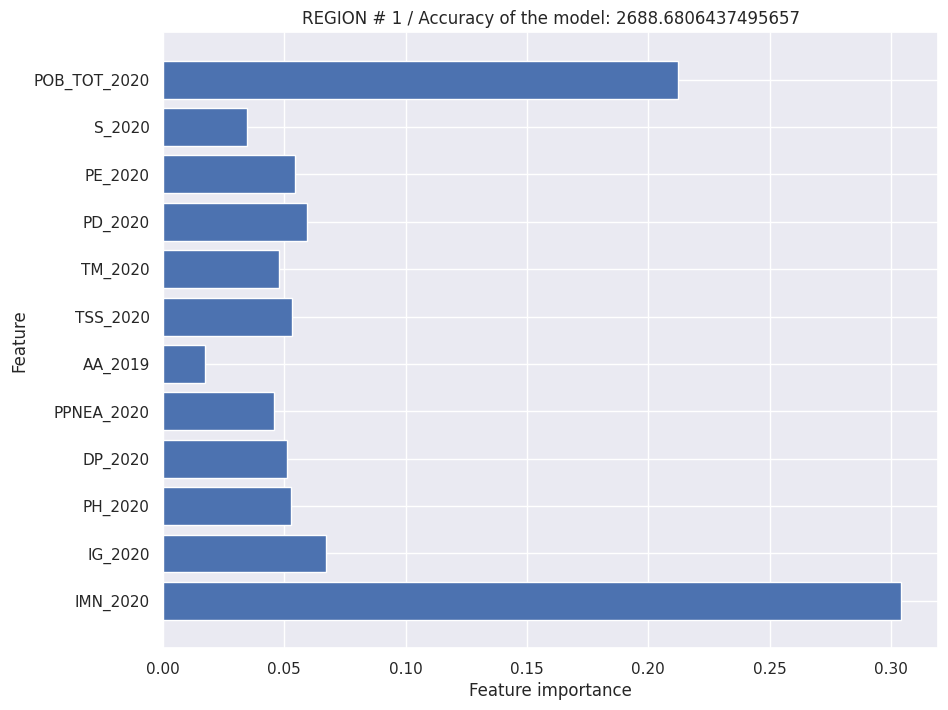

Preparation of a new explainer is initiated

  -> data              : 1106 rows 12 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1106 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7c0f25018430> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



  -> predicted values  : min = 3.46, mean = 79.6, max = 5.08e+02
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -78.6, mean = -0.475, max = 1.67e+02
  -> model_info        : package sklearn

A new explainer has been created!


Obs 281


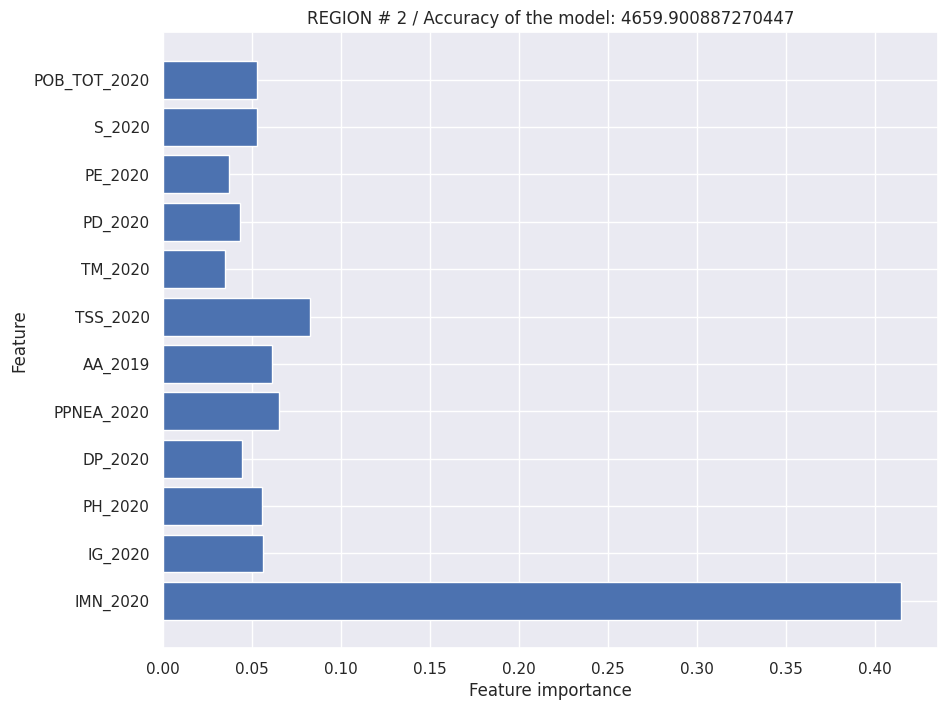

Preparation of a new explainer is initiated

  -> data              : 196 rows 12 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 196 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7c0f25018430> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 20.1, mean = 1.13e+02, max = 2.98e+02
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



  -> residuals         : min = -56.7, mean = -1.62, max = 1.24e+02
  -> model_info        : package sklearn

A new explainer has been created!


Obs 4


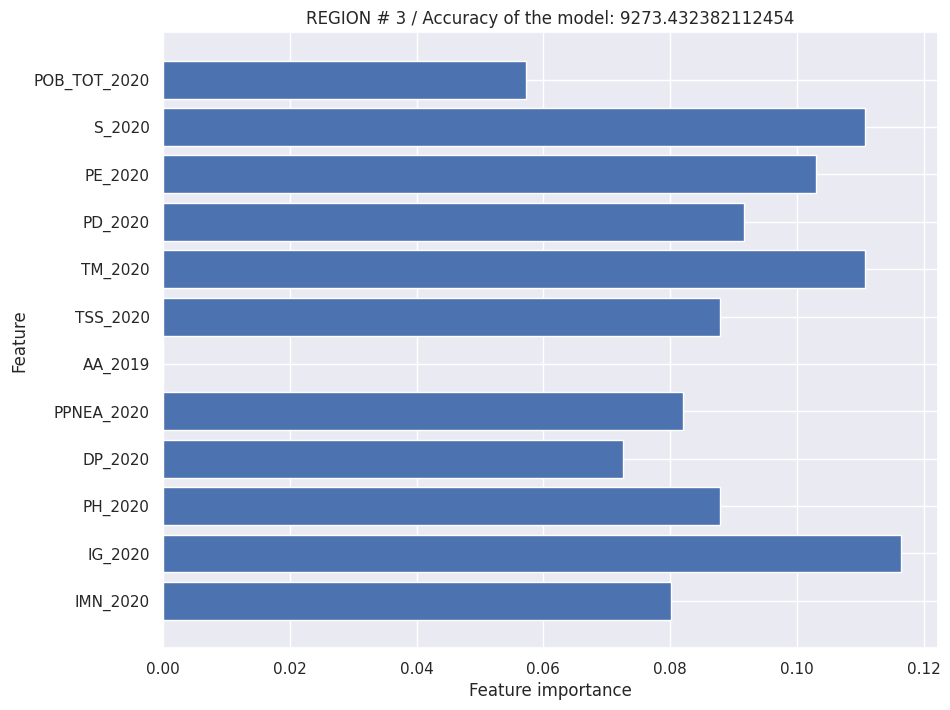

Preparation of a new explainer is initiated

  -> data              : 2 rows 12 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 2 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7c0f25018430> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.98e+02, mean = 2.31e+02, max = 2.65e+02
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -28.9, mean = 1.27, max = 31.5
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



Obs 293


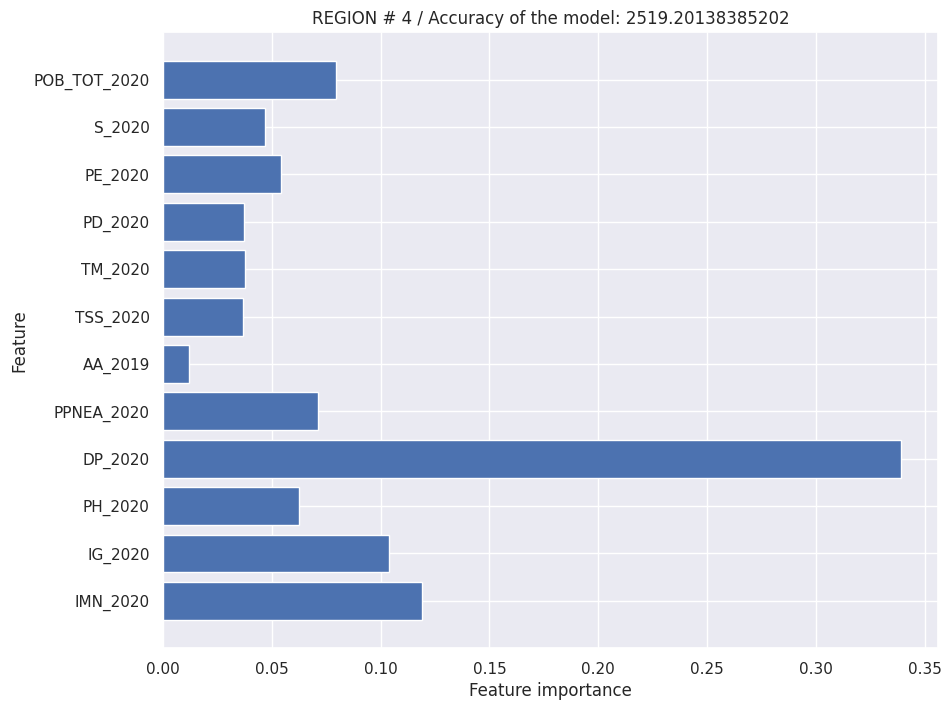

Preparation of a new explainer is initiated

  -> data              : 205 rows 12 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 205 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7c0f25018430> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 12.6, mean = 64.5, max = 2.44e+02
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



  -> residuals         : min = -40.1, mean = -1.04, max = 58.2
  -> model_info        : package sklearn

A new explainer has been created!


Obs 277


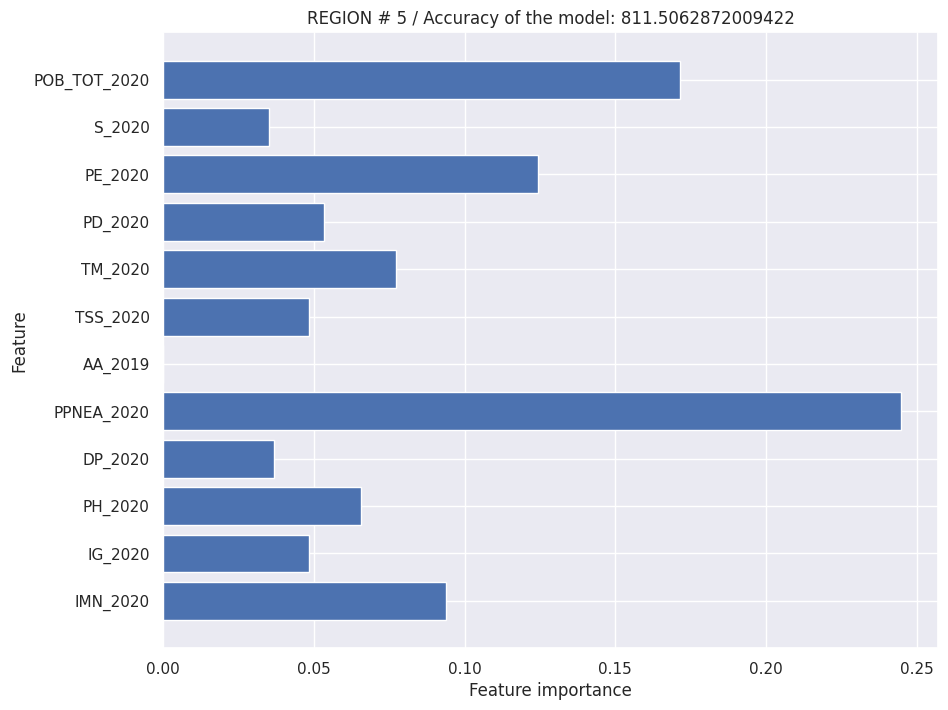

Preparation of a new explainer is initiated

  -> data              : 193 rows 12 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 193 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7c0f25018430> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 10.8, mean = 33.4, max = 1.86e+02
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



  -> residuals         : min = -29.0, mean = -0.43, max = 50.2
  -> model_info        : package sklearn

A new explainer has been created!


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn import metrics
import math
import dalex as dx

for r in range(len(c_ok)):
  print(f"Obs {len(bdr[r][cluster_variables])}")
  X_ = bdr[r][cluster_variables]
  y = indice_delictivo.loc[X_.index]["ID_2020"]
  X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.30)
  # creating a RF classifier
  #se construyen n_dt árboles de decisión que se van a construir en el bosque aleatorio
  n_dt = 1000
  clf = RandomForestRegressor(n_estimators = n_dt)
  # Training the model on the training dataset
  # fit function is used to train the model using the training sets as parameters
  clf.fit(X_train, y_train)

  # performing PREDICTIONS on the test dataset
  y_pred = clf.predict(X_test)

  # using metrics module for accuracy calculation
  accuracy = metrics.mean_squared_error(y_test, y_pred)
  #print(f"ACCURACY OF THE MODEL: {accuracy}")

  feature_imp = pd.Series(clf.feature_importances_, index = cluster_variables).sort_values(ascending = False)
  plt.rcParams['figure.figsize'] = (10, 8)
  plt.barh(np.arange(n_covariables), clf.feature_importances_, align='center')
  plt.yticks(np.arange(n_covariables), cluster_variables)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  plt.ylim(-1, n_covariables)
  plt.title(f"REGION # {r} / Accuracy of the model: {accuracy}")
  plt.show()

  #PROCESO PARA MOSTRAR LOS RESIUDUALES
  clf_exp = dx.Explainer(clf, X_train, y_train)
  md_rf = clf_exp.model_diagnostics()
  md_rf.plot(variable = "y_hat", yvariable = "residuals")
  #print(feature_imp)
  #print("----------------")